## Open Vaccine Stanford GRU Model - RNA Covid 19

**mRNA vaccines** have taken the lead as the fastest vaccine candidates for COVID-19, but currently, they face key potential limitations. One of the biggest challenges right now is **how to design super stable messenger RNA molecules (mRNA)**. 

Conventional vaccines (like your seasonal flu shots) are packaged in disposable syringes and shipped under refrigeration around the world, but that is not currently possible for mRNA vaccines.  
傳統型疫苗是由一次性針頭且存於冷藏環境下運送，但對於mRNA目前還無法做到

**Ribonucleic acid (RNA)** is a linear molecule composed of four types of smaller molecules called ribonucleotide bases: adenine (A), cytosine (C), guanine (G), and uracil (U).


Each ribonucleotide base consists of a ribose sugar, a phosphate group, and a nitrogenous base .


Researchers have observed that RNA molecules have the tendency to **spontaneously degrade**. This is a serious limitation--a single cut can render the mRNA vaccine useless. Currently, little is known on the details of where in the backbone of a given RNA is most prone to being affected. Without this knowledge, current mRNA vaccines against COVID-19 must be prepared and shipped under intense refrigeration, and are unlikely to reach more than a tiny fraction of human beings on the planet unless they can be stabilized.

**Task:** To build a model which will predict likely degradation rates at each base of an RNA molecule which can be useful To develop models and design rules for RNA degradation.  

google 翻譯：  
mRNA疫苗已成為COVID-19最快的候選疫苗，但是目前，它們面臨著潛在的主要局限性。當前最大的挑戰之一是如何設計超穩定的messenger RNA分子（mRNA）。  
  
常規疫苗（例如季節性流感疫苗）包裝在一次性注射器中，並在全球範圍內冷藏運輸，但目前尚不適用於mRNA疫苗。 
   
 核糖核酸（RNA）是由四種類型的稱為核糖核苷酸鹼基的較小分子組成的線性分子：腺嘌呤（A），胞嘧啶（C），鳥嘌呤（G）和尿嘧啶（U）.   
   
每個核糖核苷酸鹼基由核糖，磷酸基和含氮鹼基組成。  
  
研究人員已經觀察到RNA分子具有自發降解的趨勢。這是一個嚴重的限制-單次切割會使mRNA疫苗無用。目前，對於給定RNA的骨架最容易受到影響的細節知之甚少。沒有這些知識，當前的抗COVID-19的mRNA疫苗必須在嚴格的冷藏條件下進行製備和運輸，除非能夠穩定下來，否則不可能傳播到地球上一小部分人。  
  
任務：建立一個模型，該模型可以預測RNA分子每個鹼基的可能降解速率，這對於開發RNA降解模型和設計規則非常有用。

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

**Sequence Prediction**

Sequence prediction is a problem that involves using historical sequence information to predict the next value or values in the sequence. The sequence may be symbols like letters in a sentence or real values like those in a time series of prices

**GRU**

The GRU, known as the Gated Recurrent Unit is an RNN architecture, which is similar to LSTM units. The GRU comprises of the reset gate and the update gate instead of the input, output and forget gate of the LSTM.

**Bidirectional RNNs**

In a bidirectional RNN, we consider 2 separate sequences. One from right to left and the other in the reverse order.

**Bidirectional Gated Recurrent Unit (GRU)**

Bidirectional GRU's are a type of bidirectional recurrent neural networks with only the reset and update gates. It allows for the use of information from both previous time steps and later time steps to make predictions about the current state.

In [1]:
import json

import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow.keras.layers as L
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
#Set Seeds to ensure reproducibility
tf.random.set_seed(2020)
np.random.seed(2020)

##Loading the Data



In [3]:
#data = pd.read_json('data.json',lines=True)
data = pd.read_json(r'C:\Users\user\Desktop\資料科學導論\covid-19\train.json',lines=True)

In [4]:
data.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


## Data Description

**sequence** - (1x107 string) Describes the RNA sequence, a combination of A, G, U, and C for each sample. Should be 107 characters long, and the first 68 bases should correspond to the 68 positions specified in seq_scored (note: indexed starting at 0).

**structure** - (1x107 string) An array of (, ), and . characters that describe whether a base is estimated to be paired or unpaired. Paired bases are denoted by opening and closing parentheses e.g. (....) means that base 0 is paired to base 5, and bases 1-4 are unpaired.

**predicted_loop_type** - (1x107 string) Describes the structural context (also referred to as 'loop type')of each character in sequence. Loop types assigned by bpRNA from Vienna RNAfold 2 structure. From the bpRNA_documentation: S: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop

**reactivity** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likely secondary structure of the RNA sample.

**deg_pH10** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high pH (pH 10).

**deg_Mg_pH10** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium in high pH (pH 10).

**deg_50C** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).

**deg_Mg_50C** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium at high temperature (50 degrees Celsius).


# 資料視覺化

In [5]:
from functools import reduce
all_structures = reduce(lambda x,y:x+y,data['structure'].apply(list).tolist())
all_sequences = reduce(lambda x,y:x+y,data['sequence'].apply(list).tolist())
all_predicted_loop_types = reduce(lambda x,y:x+y,data['predicted_loop_type'].apply(list).tolist())

reduce說明：https://openhome.cc/Gossip/CodeData/PythonTutorial/FunctionalProgrammingPy3.html
  
lambda說明：https://www.learncodewithmike.com/2019/12/python-lambda-functions.html 

In [6]:
len(all_structures)

256800

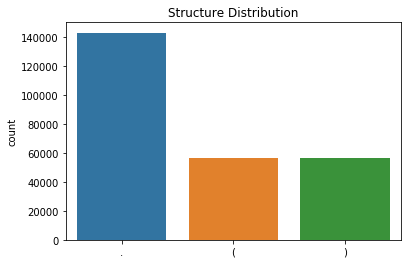

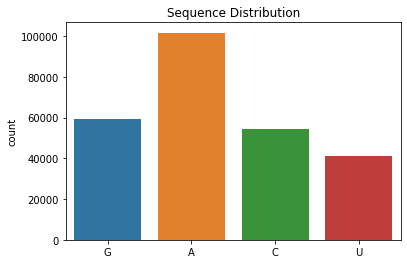

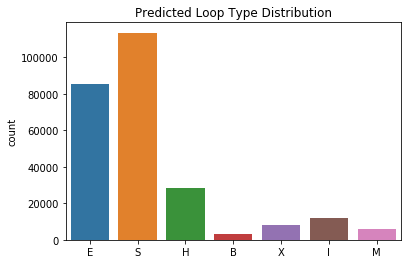

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Structure Distribution')
sns.countplot(all_structures)
plt.show()

plt.title('Sequence Distribution')
sns.countplot(all_sequences)
plt.show()

plt.title('Predicted Loop Type Distribution')
sns.countplot(all_predicted_loop_types)
plt.show()

##Plotting Average Reactivity at each Position 

In [8]:
plt.style.use('fivethirtyeight')
avg_reactivity = np.array(list(map(np.array,data.reactivity))).mean(axis=0)
avg_deg_50C = np.array(list(map(np.array,data.deg_50C))).mean(axis=0)
avg_deg_pH10 = np.array(list(map(np.array,data.deg_pH10))).mean(axis=0)
avg_deg_Mg_50C = np.array(list(map(np.array,data.deg_Mg_50C))).mean(axis=0)
avg_deg_Mg_pH10 = np.array(list(map(np.array,data.deg_Mg_pH10))).mean(axis=0)

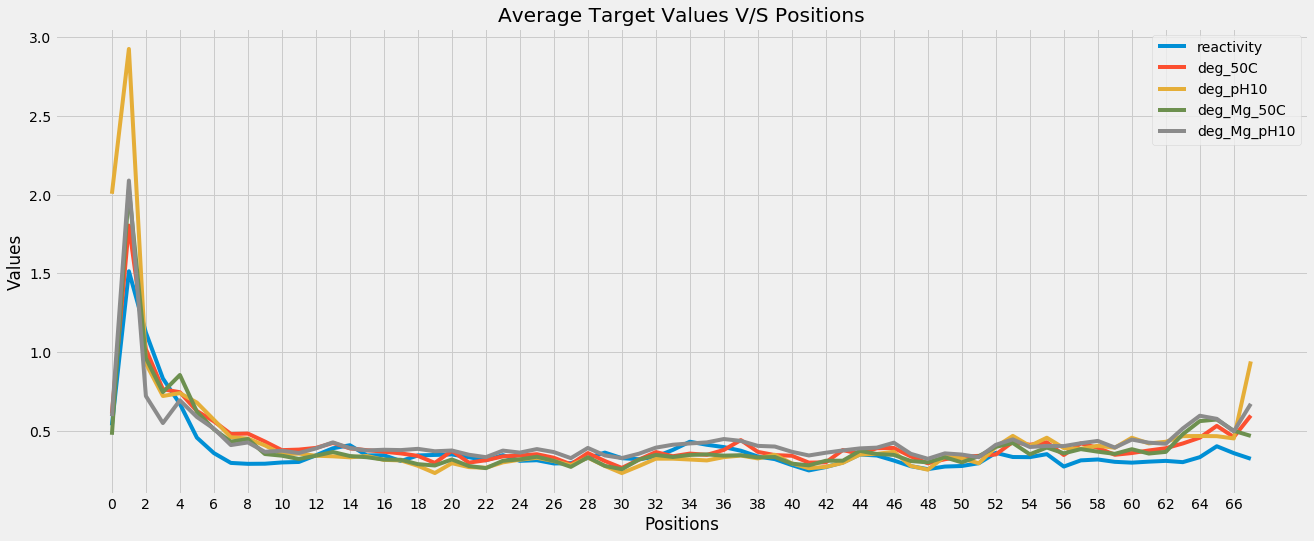

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(x=range(68),y=avg_reactivity,label='reactivity')
sns.lineplot(x=range(68),y=avg_deg_50C,label='deg_50C')
sns.lineplot(x=range(68),y=avg_deg_pH10,label='deg_pH10')
sns.lineplot(x=range(68),y=avg_deg_Mg_50C,label='deg_Mg_50C')
sns.lineplot(x=range(68),y=avg_deg_Mg_pH10,label='deg_Mg_pH10')

plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Values')
plt.title("Average Target Values V/S Positions")

plt.show()

# 建構基礎模型
## GRU
##Preprocessing the Data




In [10]:
token2int = {x:i for i,x in enumerate('().ACGUBEHIMSX')}

In [11]:
def pandas_list_to_array(df):
    return np.transpose(np.array(df.values.tolist()),(0,2,1))
def preprocess_inputs(df,token2int,cols=['sequence','structure','predicted_loop_type']):
    return pandas_list_to_array(df[cols].applymap(lambda seq:[token2int[x] for x in seq]))

applymap()說明：https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/358064/

In [12]:
pred_cols = ['reactivity','deg_Mg_pH10','deg_Mg_50C','deg_pH10','deg_50C']

In [13]:
data_inputs = preprocess_inputs(data,token2int)
data_labels = pandas_list_to_array(data[pred_cols])

In [14]:
data_inputs

array([[[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       ...,

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]]])

##Train Test Split

In [15]:
x_train,x_val,y_train,y_val = train_test_split(
    data_inputs, data_labels, test_size=.1,random_state = 34, stratify = data.SN_filter)

In [16]:
print(x_train.shape)
print(x_val.shape)

(2160, 107, 3)
(240, 107, 3)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(
x_train,y_train,test_size = .1,random_state = 34
)

In [18]:
x_train.shape
x_test.shape

(216, 107, 3)

In [19]:
def MCRMSE(y_true,y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true-y_pred),axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse),axis=1)

def gru_layer(hidden_dim,dropout):
    return L.GRU(
    hidden_dim,dropout=dropout,return_sequences=True,kernel_initializer='orthogonal'
  )

def build_model(embed_size,seq_len=107,sp_dropout=0.2,n_layers=3,
                hidden_dim=256,pred_len=68,dropout=0.5):
    inputs = L.Input(shape=(seq_len,3))

    embed=L.Embedding(input_dim=embed_size,output_dim=200)(inputs)
    reshaped=tf.reshape(
      embed, shape=(-1,embed.shape[1],embed.shape[2]*embed.shape[3])
    )
    hidden = L.SpatialDropout1D(sp_dropout)(reshaped)
    for x in range(n_layers):
        hidden = gru_layer(hidden_dim,dropout)(hidden)

    truncated = hidden[:,:pred_len]
    out = L.Dense(5,activation='linear')(truncated)
    model = tf.keras.Model(inputs=inputs,outputs=out)
    model.compile(tf.optimizers.Adam(),loss=MCRMSE,metrics=['accuracy'])

    return model

In [20]:
model=build_model(embed_size=len(token2int))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 107, 3)]          0         
_________________________________________________________________
embedding (Embedding)        (None, 107, 3, 200)       2800      
_________________________________________________________________
tf.reshape (TFOpLambda)      (None, 107, 600)          0         
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 107, 600)          0         
_________________________________________________________________
gru (GRU)                    (None, 107, 256)          658944    
_________________________________________________________________
gru_1 (GRU)                  (None, 107, 256)          394752    
_________________________________________________________________
gru_2 (GRU)                  (None, 107, 256)          394752

In [21]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    batch_size = 64,
    epochs = 30,
    verbose=2,
    callbacks=[
               tf.keras.callbacks.ReduceLROnPlateau(patience=5),
               tf.keras.callbacks.ModelCheckpoint('model.h5')
              
    ]
)

Epoch 1/30
31/31 - 44s - loss: 0.6440 - accuracy: 0.2550 - val_loss: 0.6646 - val_accuracy: 0.2850
Epoch 2/30
31/31 - 48s - loss: 0.5756 - accuracy: 0.2942 - val_loss: 0.6372 - val_accuracy: 0.2763
Epoch 3/30
31/31 - 42s - loss: 0.5566 - accuracy: 0.2974 - val_loss: 0.6261 - val_accuracy: 0.3037
Epoch 4/30
31/31 - 42s - loss: 0.5477 - accuracy: 0.3256 - val_loss: 0.6190 - val_accuracy: 0.3457
Epoch 5/30
31/31 - 48s - loss: 0.5437 - accuracy: 0.3372 - val_loss: 0.6182 - val_accuracy: 0.3478
Epoch 6/30
31/31 - 45s - loss: 0.5420 - accuracy: 0.3379 - val_loss: 0.6170 - val_accuracy: 0.3427
Epoch 7/30
31/31 - 45s - loss: 0.5407 - accuracy: 0.3436 - val_loss: 0.6172 - val_accuracy: 0.3399
Epoch 8/30
31/31 - 46s - loss: 0.5407 - accuracy: 0.3422 - val_loss: 0.6153 - val_accuracy: 0.3371
Epoch 9/30
31/31 - 46s - loss: 0.5394 - accuracy: 0.3441 - val_loss: 0.6145 - val_accuracy: 0.3542
Epoch 10/30
31/31 - 44s - loss: 0.5393 - accuracy: 0.3455 - val_loss: 0.6137 - val_accuracy: 0.3501
Epoch 11/

##Plotting

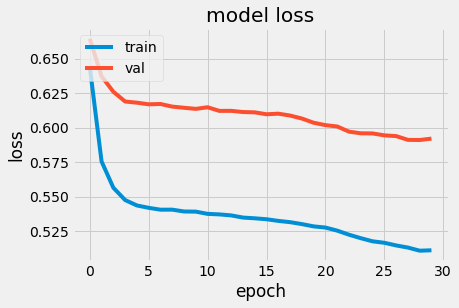

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

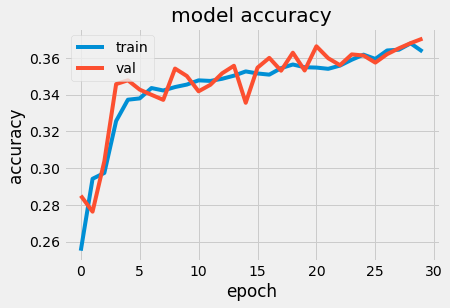

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

##Evaluation

In [24]:
model.evaluate(x_test,y_test,batch_size=128)

2/2 [==============================] - 1s 512ms/step - loss: 0.4519 - accuracy: 0.3900


[0.45194461941719055, 0.38997820019721985]

## Prediction

Generates output predictions for the input samples.

In [25]:
y_prediction = model.predict(x_test)
y_prediction.shape
print(pd.DataFrame(y_prediction[0]))

pred_cols = ['reactivity','deg_Mg_pH10','deg_Mg_50C','deg_pH10','deg_50C']

           0         1         2         3         4
0   0.610484  0.660048  0.516793  2.135775  0.700426
1   1.660043  2.225088  2.159742  3.091743  2.005563
2   1.329485  0.766911  1.037860  1.035201  1.207726
3   1.022700  0.649329  0.861308  0.805506  1.009393
4   0.804490  0.757295  0.848287  0.815164  0.866836
..       ...       ...       ...       ...       ...
63  0.532737  0.683861  0.544328  0.587748  0.471807
64  0.234185  0.376033  0.360553  0.370971  0.368683
65  0.405648  0.429120  0.486438  0.383452  0.465488
66  0.185570  0.444590  0.466985  0.481524  0.390290
67  0.177726  0.280047  0.338040  0.342067  0.310577

[68 rows x 5 columns]


In [26]:
y_prediction.shape

(216, 68, 5)

In [27]:
def degradation_sample(index):
    orig_cols = ['reactivity','deg_Mg_pH10','deg_Mg_50C','deg_pH10','deg_50C']
    pred_cols = ['reactivity_prediction','deg_Mg_pH10_prediction','deg_Mg_50C_prediction','deg_pH10_prediction','deg_50C_prediction']
    predicted_df = pd.DataFrame(y_prediction[index],columns=pred_cols)
    original_df = pd.DataFrame(y_test[index],columns=orig_cols)
    ori_predicted_df = pd.concat([original_df,predicted_df],axis=1)
    return ori_predicted_df

In [28]:
degradation_sample(5)

,reactivity,deg_Mg_pH10,deg_Mg_50C,deg_pH10,deg_50C,reactivity_prediction,deg_Mg_pH10_prediction,deg_Mg_50C_prediction,deg_pH10_prediction,deg_50C_prediction
0,0.5197,0.4219,0.3691,2.4733,0.2990,0.610484,0.660048,0.516793,2.135775,0.700426
1,1.4384,1.1828,1.2720,3.6359,1.2906,1.660043,2.225088,2.159742,3.091743,2.005563
2,1.5877,0.5025,0.8128,1.1657,1.4897,1.329485,0.766911,1.037860,1.035201,1.207726
3,1.0499,0.1090,0.4068,0.5559,1.0490,1.022700,0.649329,0.861308,0.805506,1.009393
4,0.9699,0.3131,0.6023,0.4260,1.2856,0.804490,0.757295,0.848287,0.815164,0.866836
...,...,...,...,...,...,...,...,...,...,...
63,0.3064,0.5134,0.5695,0.5874,0.3585,0.222107,0.215205,0.219011,0.171243,0.203395
64,0.8167,0.8264,1.1151,0.5294,0.5093,0.398097,0.412470,0.500444,0.276972,0.436582
65,0.8507,1.2790,1.1382,1.2147,0.7310,0.458295,0.690779,0.621584,0.539275,0.497231
66,0.4599,0.3236,0.4721,0.3906,0.4512,0.507657,0.479117,0.515991,0.384086,0.356001


# 建構進階模型
## AE pretrain + GNN + Attn + CNN  
參考來源：https://www.kaggle.com/c7934597/covid-ae-pretrain-gnn-attn-cnn

In [29]:
pretrain_dir = None # model dir for resuming training. if None, train from scrach
one_fold = False # if True, train model at only first fold. use if you try a new idea quickly.
run_test = False # if True, use small data. you can check whether this code run or not
denoise = True # if True, use train data whose signal_to_noise > 1

ae_epochs = 20 # epoch of training of denoising auto encoder
ae_epochs_each = 5 # epoch of training of denoising auto encoder each time. 
                   # I use train data (seqlen = 107) and private test data (seqlen = 130) for auto encoder training.
                   # I dont know how to easily fit keras model to use both of different shape data simultaneously, 
                   # so I call fit function several times. 
ae_batch_size = 32

epochs_list = [30, 10, 3, 3, 5, 5]
batch_size_list = [8, 16, 32, 64, 128, 256] 

## copy pretrain model to working dir
import shutil
import glob
if pretrain_dir is not None:
    for d in glob.glob(pretrain_dir + "*"):
        shutil.copy(d, ".")
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
!unzip bpps.zip

'unzip' 不是內部或外部命令、可執行的程式或批次檔。


In [31]:
import json
import glob
from tqdm.notebook import tqdm
from pathlib import Path
# load train data
#train = pd.read_json("train.json",lines=True)
train = pd.read_json(r'C:\Users\user\Desktop\資料科學導論\covid-19\train.json',lines=True)
if denoise:
    train = train[train.signal_to_noise > 1].reset_index(drop = True)
# load test data
#test  = pd.read_json("test.json",lines=True)
test = pd.read_json(r'C:\Users\user\Desktop\資料科學導論\covid-19\test.json',lines=True)
test_pub = test[test["seq_length"] == 107]
test_pri = test[test["seq_length"] == 130]
# load submission.csv
sub = pd.read_csv(r'C:\Users\user\Desktop\資料科學導論\covid-19\sample_submission.csv')

if run_test: ## to test 
    train = train[:30]
    test_pub = test_pub[:30]
    test_pri = test_pri[:30]

As = []

DATA_DIR = Path(r"C:/Users/user/Desktop/資料科學導論/covid-19/")
BPPS_DIR = DATA_DIR / "bpps"

for id in tqdm(train["id"]):
    a = np.load(BPPS_DIR / f"{id}.npy")
    As.append(a)
As = np.array(As)

As_pub = []
for id in tqdm(test_pub["id"]):
    a = np.load(BPPS_DIR / f"{id}.npy")
    As_pub.append(a)
As_pub = np.array(As_pub)

As_pri = []
for id in tqdm(test_pri["id"]):
    a = np.load(BPPS_DIR / f"{id}.npy")
    As_pri.append(a)
As_pri = np.array(As_pri)

### 先看train test submission長怎樣

In [32]:
print(train.shape)
train.head()

(2096, 19)


,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
2,5,id_00ab2d761,GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCA...,.....(.(((((.(((((((((...........)))))))..(((....,EEEEESISSSSSISSSSSSSSSHHHHHHHHHHHSSSSSSSMMSSSH...,4.136,1,107,68,"[0.1942, 0.2041, 0.1626, 0.1213, 0.10590000000...","[0.2726, 0.2984, 0.21660000000000001, 0.1637, ...","[0.3393, 0.2728, 0.2005, 0.1703, 0.1495, 0.134...","[0.165, 0.20520000000000002, 0.179, 0.1333, 0....","[0.2864, 0.24710000000000001, 0.2222, 0.1903, ...","[0.7642, 1.6641, 1.0622, 0.5008, 0.4107, 0.133...","[0.9559000000000001, 1.9442, 1.0114, 0.5105000...","[1.9554, 2.1298, 1.0403, 0.609, 0.5486, 0.386,...","[0.22460000000000002, 1.7281, 1.381, 0.6623, 0...","[0.5882000000000001, 1.1786, 0.9704, 0.6035, 0..."
3,6,id_00abef1d7,GGAAAACAAUUGCAUCGUUAGUACGACUCCACAGCGUAAGCUGUGG...,.........((((((((......((((((((((((....)))))))...,EEEEEEEEESSSSSSSSIIIIIISSSSSSSSSSSSHHHHSSSSSSS...,2.485,1,107,68,"[0.422, 0.5478000000000001, 0.4749000000000000...","[0.4801, 0.7943, 0.42160000000000003, 0.397300...","[0.9822000000000001, 1.272, 0.6940000000000001...","[0.5827, 0.7555000000000001, 0.5949, 0.4511, 0...","[0.9306000000000001, 1.0496, 0.5844, 0.7796000...","[0.895, 2.3377, 2.2305, 2.003, 1.9006, 1.0373,...","[0.46040000000000003, 3.6695, 0.78550000000000...","[2.7711, 7.365, 1.6924000000000001, 1.43840000...","[1.073, 2.8604000000000003, 1.9936, 1.0273, 1....","[2.0964, 3.3688000000000002, 0.6399, 2.1053, 1..."
4,7,id_00b436dec,GGAAAUCAUCGAGGACGGGUCCGUUCAGCACGCGAAAGCGUCGUGA...,.....(((((((((((..(((((((((..((((....))))..)))...,EEEEESSSSSSSSSSSIISSSSSSSSSIISSSSHHHHSSSSIISSS...,1.727,1,107,68,"[0.4843, 0.5233, 0.4554, 0.43520000000000003, ...","[0.8719, 1.0307, 0.6649, 0.34500000000000003, ...","[0.7045, 0.7775000000000001, 0.5662, 0.4561, 0...","[0.384, 0.723, 0.4766, 0.30260000000000004, 0....","[0.7429, 0.9137000000000001, 0.480400000000000...","[1.1576, 1.5137, 1.3382, 1.5622, 1.2121, 0.295...","[1.6912, 5.2652, 2.3901, 0.45890000000000003, ...","[1.8641, 2.3767, 1.149, 1.0132, 0.9876, 0.0, 0...","[0.49060000000000004, 4.6339, 1.95860000000000...","[1.2852000000000001, 2.5460000000000003, 0.234..."


In [33]:
print(test.shape)
test.head()

(3634, 7)


,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [34]:
print(sub.shape)
sub.head()

(457953, 6)


,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


### 整理出要拿來訓練的資料  
stack、vstack、hstack的介紹：https://www.twblogs.net/a/5b8462da2b71775d1cd08967

In [35]:
targets = list(sub.columns[1:])
print(targets) # 先印出要預測的那五個欄位名稱

y_train = [] 
seq_len = train["seq_length"].iloc[0] # 取出train.seq_length 的第一個值，來看長度是多少 (107)
seq_len_target = train["seq_scored"].iloc[0] # 取出train.seq_scored 的第一個值，來看會評分的長度到多少 (68)

ignore = -10000
ignore_length = seq_len - seq_len_target # 在68後面的值可以忽略

for target in targets:
    y = np.vstack(train[target]) # 將train.target 的矩陣疊起來 ex.target=reactivity, 則每一列都有一個[...]總共有2096個, then y = [[],[]...[]] (2096x68的矩陣)
    dummy = np.zeros([y.shape[0], ignore_length]) + ignore # y.shape[0]=2096, ignore_length=39, 產生一個2096x39的0矩陣，最後每個值加上 -10000
    y = np.hstack([y, dummy]) # y & dummy 延水平方向連接 變成2096x107的矩陣
    y_train.append(y)
y = np.stack(y_train, axis = 2) # axis=i時，代表在堆疊時首先選取第i維進行“打包”
y.shape

['reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C']


(2096, 107, 5)

### 取出structure feature
取出structure的Adjacency Matrix 

In [36]:
def get_structure_adj(train):
    ## get adjacent matrix from structure sequence
    
    ## here I calculate adjacent matrix of each base pair, 
    ## but eventually ignore difference of base pair and integrate into one matrix
    Ss = []
    for i in tqdm(range(len(train))): #len(train)=2096
        seq_length = train["seq_length"].iloc[i] # 取出每一列各自的seq_length (ex.107)
        structure = train["structure"].iloc[i] # 取出每一列各自的structure
        sequence = train["sequence"].iloc[i] # 取出每一列各自的sequence

        cue = [] 
        a_structures = {
            ("A", "U") : np.zeros([seq_length, seq_length]), # ex.產生107x107的零矩陣
            ("C", "G") : np.zeros([seq_length, seq_length]),
            ("U", "G") : np.zeros([seq_length, seq_length]),
            ("U", "A") : np.zeros([seq_length, seq_length]),
            ("G", "C") : np.zeros([seq_length, seq_length]),
            ("G", "U") : np.zeros([seq_length, seq_length]),
        }
        a_structure = np.zeros([seq_length, seq_length])
        for i in range(seq_length):
            if structure[i] == "(": # 紀錄一對的鹼基 的起始位置
                cue.append(i) 
            elif structure[i] == ")": #代表此時的i是一對的 終點位置
                start = cue.pop() # 取出起始位置的index
#                 a_structure[start, i] = 1
#                 a_structure[i, start] = 1
                a_structures[(sequence[start], sequence[i])][start, i] = 1 # 到對應的matrix 將該點的0改為1
                a_structures[(sequence[i], sequence[start])][i, start] = 1
        
        a_strc = np.stack([a for a in a_structures.values()], axis = 2)
        a_strc = np.sum(a_strc, axis = 2, keepdims = True)
        Ss.append(a_strc)
    
    Ss = np.array(Ss)
    print(Ss.shape)
    return Ss
Ss = get_structure_adj(train)
Ss_pub = get_structure_adj(test_pub)
Ss_pri = get_structure_adj(test_pri)


(2096, 107, 107, 1)



(629, 107, 107, 1)



(3005, 130, 130, 1)


#取出distance matrix

In [37]:
def get_distance_matrix(As):
    ## adjacent matrix based on distance on the sequence
    ## D[i, j] = 1 / (abs(i - j) + 1) ** pow, pow = 1, 2, 4
    
    idx = np.arange(As.shape[1]) # [0,1,...,106]
    Ds = []
    for i in range(len(idx)):
        d = np.abs(idx[i] - idx) # 計算0到所有點的距離,1到所有點的距離...以此類推共算107次
        Ds.append(d) # 有107個[...] = 107x107的矩陣

    Ds = np.array(Ds) + 1 
    Ds = 1/Ds
    Ds = Ds[None, :,:] # 把Ds變成三維的 ex.(1,107,107)
    Ds = np.repeat(Ds, len(As), axis = 0) #重複2096次，因為有2096筆 ex.len(As)=2096 axis=0是針對column 此時Ds=(2096,107,107) 

    Dss = []
    for i in [1, 2, 4]: 
        Dss.append(Ds ** i) # **:次方 把Ds分別 一次方 & 平方 & 四次方 再家到Dss這個list

    Ds = np.stack(Dss, axis = 3) # 把Dss(長度三的list)給stack起來
    print(Ds.shape)
    return Ds

# As是bpps的資訊
Ds = get_distance_matrix(As)
Ds_pub = get_distance_matrix(As_pub)
Ds_pri = get_distance_matrix(As_pri)

(2096, 107, 107, 3)
(629, 107, 107, 3)
(3005, 130, 130, 3)


In [38]:
## concat adjecent
As = np.concatenate([As[:,:,:,None], Ss, Ds], axis = 3).astype(np.float32) # 先把As改成四維 再和Ss Ds接在一起 
As_pub = np.concatenate([As_pub[:,:,:,None], Ss_pub, Ds_pub], axis = 3).astype(np.float32)
As_pri = np.concatenate([As_pri[:,:,:,None], Ss_pri, Ds_pri], axis = 3).astype(np.float32)
del Ss, Ds, Ss_pub, Ds_pub, Ss_pri, Ds_pri
As.shape, As_pub.shape, As_pri.shape

((2096, 107, 107, 5), (629, 107, 107, 5), (3005, 130, 130, 5))

In [39]:
## sequence
def return_ohe(n, i):
    tmp = [0] * n
    tmp[i] = 1
    return tmp # return一個list

def get_input(train):
    ## get node features, which is one hot encoded
    mapping = {}
    vocab = ["A", "G", "C", "U"]
    for i, s in enumerate(vocab):
        mapping[s] = return_ohe(len(vocab), i) # mapping={"A":[1,0,0,0],"G":[0,1,0,0],"C":[0,0,1,0],"U":[0,0,0,1]}
    X_node = np.stack(train["sequence"].apply(lambda x : list(map(lambda y : mapping[y], list(x))))) # 每一個sequence 當作x ，x內的每個值當作y，y做ohe
    
    # 對loop type做一樣的事
    mapping = {}
    vocab = ["S", "M", "I", "B", "H", "E", "X"]
    for i, s in enumerate(vocab):
        mapping[s] = return_ohe(len(vocab), i)
    X_loop = np.stack(train["predicted_loop_type"].apply(lambda x : list(map(lambda y : mapping[y], list(x)))))

    # 對structure做一樣的事
    mapping = {}
    vocab = [".", "(", ")"]
    for i, s in enumerate(vocab):
        mapping[s] = return_ohe(len(vocab), i)
    X_structure = np.stack(train["structure"].apply(lambda x : list(map(lambda y : mapping[y], list(x)))))

    X_node = np.concatenate([X_node, X_loop], axis = 2) # 把X_node和X_loop接在一起，此時X_node.shape=(2096,107,11)

    ## interaction
    a = np.sum(X_node * (2 ** np.arange(X_node.shape[2])[None, None, :]), axis = 2) # X_node.shape[2]=11 a.shape=(2096,107)
    vocab = sorted(set(a.flatten())) # set:轉換成集合，也就是重複的值都會被刪掉
    print(vocab)
    ohes = []
    for v in vocab:
        ohes.append(a == v) 
    ohes = np.stack(ohes, axis = 2) # ohes.shape=(2096,107,28)
    X_node = np.concatenate([X_node, ohes], axis = 2).astype(np.float32) # 把X_node和ohes接在一起，X_node.shape=(2096,107,39)
    
    print(X_node.shape)
    return X_node

X_node = get_input(train)
X_node_pub = get_input(test_pub)
X_node_pri = get_input(test_pri)

[17, 18, 20, 24, 33, 34, 36, 40, 65, 66, 68, 72, 129, 130, 132, 136, 257, 258, 260, 264, 513, 514, 516, 520, 1025, 1026, 1028, 1032]
(2096, 107, 39)
[17, 18, 20, 24, 33, 34, 36, 40, 65, 66, 68, 72, 129, 130, 132, 136, 257, 258, 260, 264, 513, 514, 516, 520, 1025, 1026, 1028, 1032]
(629, 107, 39)
[17, 18, 20, 24, 33, 34, 36, 40, 65, 66, 68, 72, 129, 130, 132, 136, 257, 258, 260, 264, 513, 514, 516, 520, 1025, 1026, 1028, 1032]
(3005, 130, 39)


### Model

In [40]:
!pip install tensorflow_addons

In [41]:
import tensorflow as tf
from tensorflow.keras import layers as L
import tensorflow_addons as tfa
from tensorflow.keras import backend as K

def mcrmse(t, p, seq_len_target = seq_len_target):
    ## calculate mcrmse score by using numpy
    t = t[:, :seq_len_target]
    p = p[:, :seq_len_target]
    score = np.mean(np.sqrt(np.mean(np.mean((p - t) ** 2, axis = 1), axis = 0)))
    return score

def mcrmse_loss(t, y, seq_len_target = seq_len_target):
    ## calculate mcrmse score by using tf
    t = t[:, :seq_len_target]
    y = y[:, :seq_len_target]
    
    loss = tf.reduce_mean(tf.sqrt(tf.reduce_mean(tf.reduce_mean((t - y) ** 2, axis = 1), axis = 0)))
    return loss

def attention(x_inner, x_outer, n_factor, dropout):
    x_Q =  L.Conv1D(n_factor, 1, activation='linear', 
                  kernel_initializer='glorot_uniform',
                  bias_initializer='glorot_uniform',
                 )(x_inner)
    x_K =  L.Conv1D(n_factor, 1, activation='linear', 
                  kernel_initializer='glorot_uniform',
                  bias_initializer='glorot_uniform',
                 )(x_outer)
    x_V =  L.Conv1D(n_factor, 1, activation='linear', 
                  kernel_initializer='glorot_uniform',
                  bias_initializer='glorot_uniform',
                 )(x_outer)
    x_KT = L.Permute((2, 1))(x_K)
    res = L.Lambda(lambda c: K.batch_dot(c[0], c[1]) / np.sqrt(n_factor))([x_Q, x_KT])
#     res = tf.expand_dims(res, axis = 3)
#     res = L.Conv2D(16, 3, 1, padding = "same", activation = "relu")(res)
#     res = L.Conv2D(1, 3, 1, padding = "same", activation = "relu")(res)
#     res = tf.squeeze(res, axis = 3)
    att = L.Lambda(lambda c: K.softmax(c, axis=-1))(res)
    att = L.Lambda(lambda c: K.batch_dot(c[0], c[1]))([att, x_V])
    return att

def multi_head_attention(x, y, n_factor, n_head, dropout):
    if n_head == 1:
        att = attention(x, y, n_factor, dropout)
    else:
        n_factor_head = n_factor // n_head
        heads = [attention(x, y, n_factor_head, dropout) for i in range(n_head)]
        att = L.Concatenate()(heads)
        att = L.Dense(n_factor, 
                      kernel_initializer='glorot_uniform',
                      bias_initializer='glorot_uniform',
                     )(att)
    x = L.Add()([x, att])
    x = L.LayerNormalization()(x)
    if dropout > 0:
        x = L.Dropout(dropout)(x)
    return x

def res(x, unit, kernel = 3, rate = 0.1):
    h = L.Conv1D(unit, kernel, 1, padding = "same", activation = None)(x)
    h = L.LayerNormalization()(h)
    h = L.LeakyReLU()(h)
    h = L.Dropout(rate)(h)
    return L.Add()([x, h])

def forward(x, unit, kernel = 3, rate = 0.1):
#     h = L.Dense(unit, None)(x)
    h = L.Conv1D(unit, kernel, 1, padding = "same", activation = None)(x)
    h = L.LayerNormalization()(h)
    h = L.Dropout(rate)(h)
#         h = tf.keras.activations.swish(h)
    h = L.LeakyReLU()(h)
    h = res(h, unit, kernel, rate)
    return h

def adj_attn(x, adj, unit, n = 2, rate = 0.1):
    x_a = x
    x_as = []
    for i in range(n):
        x_a = forward(x_a, unit)
        x_a = tf.matmul(adj, x_a) ## aggregate neighborhoods
        x_as.append(x_a)
    if n == 1:
        x_a = x_as[0]
    else:
        x_a = L.Concatenate()(x_as)
    x_a = forward(x_a, unit)
    return x_a


def get_base(config):
    ## base model architecture 
    ## node, adj -> middle feature
    
    node = tf.keras.Input(shape = (None, X_node.shape[2]), name = "node")
    adj = tf.keras.Input(shape = (None, None, As.shape[3]), name = "adj")
    
    adj_learned = L.Dense(1, "relu")(adj)
    adj_all = L.Concatenate(axis = 3)([adj, adj_learned])
        
    xs = []
    xs.append(node)
    x1 = forward(node, 128, kernel = 3, rate = 0.0)
    x2 = forward(x1, 64, kernel = 6, rate = 0.0)
    x3 = forward(x2, 32, kernel = 15, rate = 0.0)
    x4 = forward(x3, 16, kernel = 30, rate = 0.0)
    x = L.Concatenate()([x1, x2, x3, x4])
    
    for unit in [64, 32]:
        x_as = []
        for i in range(adj_all.shape[3]):
            x_a = adj_attn(x, adj_all[:, :, :, i], unit, rate = 0.0)
            x_as.append(x_a)
        x_c = forward(x, unit, kernel = 30)
        
        x = L.Concatenate()(x_as + [x_c])
        x = forward(x, unit)
        x = multi_head_attention(x, x, unit, 4, 0.0)
        xs.append(x)
        
    x = L.Concatenate()(xs)

    model = tf.keras.Model(inputs = [node, adj], outputs = [x])
    return model


def get_ae_model(base, config):
    ## denoising auto encoder part
    ## node, adj -> middle feature -> node
    
    node = tf.keras.Input(shape = (None, X_node.shape[2]), name = "node")
    adj = tf.keras.Input(shape = (None, None, As.shape[3]), name = "adj")

    x = base([L.SpatialDropout1D(0.3)(node), adj])
    x = forward(x, 64, rate = 0.3)
    p = L.Dense(X_node.shape[2], "sigmoid")(x)
    
    loss = - tf.reduce_mean(20 * node * tf.math.log(p + 1e-4) + (1 - node) * tf.math.log(1 - p + 1e-4))
    model = tf.keras.Model(inputs = [node, adj], outputs = [loss])
    
    opt = get_optimizer()
    model.compile(optimizer = opt, loss = lambda t, y : y)
    return model


def get_model(base, config):
    ## regression part
    ## node, adj -> middle feature -> prediction of targets
    
    node = tf.keras.Input(shape = (None, X_node.shape[2]), name = "node")
    adj = tf.keras.Input(shape = (None, None, As.shape[3]), name = "adj")
    
    x = base([node, adj])
    x = forward(x, 128, rate = 0.4)
    x = L.Dense(5, None)(x)

    model = tf.keras.Model(inputs = [node, adj], outputs = [x])
    
    opt = get_optimizer()
    model.compile(optimizer = opt, loss = mcrmse_loss)
    return model

def get_optimizer():
#     sgd = tf.keras.optimizers.SGD(0.05, momentum = 0.9, nesterov=True)
    adam = tf.optimizers.Adam()
#     radam = tfa.optimizers.RectifiedAdam()
#     lookahead = tfa.optimizers.Lookahead(adam, sync_period=6)
#     swa = tfa.optimizers.SWA(adam)
    return adam

In [42]:
# 看auto encoder model
config = {}
base = get_base(config)
ae_model = get_ae_model(base, config)
ae_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
node (InputLayer)               [(None, None, 39)]   0                                            
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, None, 39)     0           node[0][0]                       
__________________________________________________________________________________________________
adj (InputLayer)                [(None, None, None,  0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, None, 135)    1906022     spatial_dropout1d_1[0][0]        
                                                                 adj[0][0]                  

In [43]:
## here train denoising auto encoder model using all data

config = {} ## not use now
if ae_epochs > 0:
    base = get_base(config)
    ae_model = get_ae_model(base, config)
    ## TODO : simultaneous train
    for i in range(ae_epochs//ae_epochs_each):
        print(f"------ {i} ------")
        print("--- train ---")
        ae_model.fit([X_node, As], [X_node[:,0]],
                  epochs = ae_epochs_each,
                  batch_size = ae_batch_size)
        print("--- public ---")
        ae_model.fit([X_node_pub, As_pub], [X_node_pub[:,0]],
                  epochs = ae_epochs_each,
                  batch_size = ae_batch_size)
        print("--- private ---")
        ae_model.fit([X_node_pri, As_pri], [X_node_pri[:,0]],
                  epochs = ae_epochs_each,
                  batch_size = ae_batch_size)
        gc.collect()
    print("****** save ae model ******")
    base.save_weights("./base_ae")

------ 0 ------
--- train ---
Epoch 1/5
66/66 [==============================] - 103s 1s/step - loss: 0.8996
Epoch 2/5
66/66 [==============================] - 83s 1s/step - loss: 0.3239
Epoch 3/5
66/66 [==============================] - 86s 1s/step - loss: 0.1681
Epoch 4/5
66/66 [==============================] - 86s 1s/step - loss: 0.1083
Epoch 5/5
66/66 [==============================] - 86s 1s/step - loss: 0.0817
--- public ---
Epoch 1/5
20/20 [==============================] - 29s 1s/step - loss: 0.0748
Epoch 2/5
20/20 [==============================] - 27s 1s/step - loss: 0.0731
Epoch 3/5
20/20 [==============================] - 26s 1s/step - loss: 0.0641
Epoch 4/5
20/20 [==============================] - 26s 1s/step - loss: 0.0583
Epoch 5/5
20/20 [==============================] - 26s 1s/step - loss: 0.0504
--- private ---
Epoch 1/5
94/94 [==============================] - 172s 2s/step - loss: 0.0527
Epoch 2/5
94/94 [==============================] - 161s 2s/step - loss: 0.0439


In [44]:
# train model
config = {}
base = get_base(config)
base.load_weights("./base_ae")
model = get_model(base, config)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
node (InputLayer)               [(None, None, 39)]   0                                            
__________________________________________________________________________________________________
adj (InputLayer)                [(None, None, None,  0                                            
__________________________________________________________________________________________________
model_5 (Functional)            (None, None, 135)    1906022     node[0][0]                       
                                                                 adj[0][0]                        
__________________________________________________________________________________________________
conv1d_340 (Conv1D)             (None, None, 128)    51968       model_5[0][0]              

In [45]:
## here train regression model from pretrain auto encoder model

from sklearn.model_selection import KFold
kfold = KFold(5, shuffle = True, random_state = 42)

scores = []
preds = np.zeros([len(X_node), X_node.shape[1], 5])
for i, (tr_idx, va_idx) in enumerate(kfold.split(X_node, As)):
    print(f"------ fold {i} start -----")
    print(f"------ fold {i} start -----")
    print(f"------ fold {i} start -----")
    X_node_tr = X_node[tr_idx]
    X_node_va = X_node[va_idx]
    As_tr = As[tr_idx]
    As_va = As[va_idx]
    y_tr = y[tr_idx]
    y_va = y[va_idx]
    
    base = get_base(config)
    if ae_epochs > 0:
        print("****** load ae model ******")
        base.load_weights("./base_ae")
    model = get_model(base, config)
    if pretrain_dir is not None:
        d = f"./model{i}"
        print(f"--- load from {d} ---")
        model.load_weights(d)
    for epochs, batch_size in zip(epochs_list, batch_size_list):
        print(f"epochs : {epochs}, batch_size : {batch_size}")
        model.fit([X_node_tr, As_tr], [y_tr],
                  validation_data=([X_node_va, As_va], [y_va]),
                  epochs = epochs,
                  batch_size = batch_size, validation_freq = 3)
        
    model.save_weights(f"./model{i}")
    p = model.predict([X_node_va, As_va])
    scores.append(mcrmse(y_va, p))
    print(f"fold {i}: mcrmse {scores[-1]}")
    preds[va_idx] = p
    if one_fold:
        break
        
pd.to_pickle(preds, "oof.pkl")

------ fold 0 start -----
------ fold 0 start -----
------ fold 0 start -----
****** load ae model ******
epochs : 30, batch_size : 8
Epoch 1/30
210/210 [==============================] - 114s 450ms/step - loss: 0.5649
Epoch 2/30
210/210 [==============================] - 94s 448ms/step - loss: 0.3349
Epoch 3/30
210/210 [==============================] - 106s 505ms/step - loss: 0.3052 - val_loss: 0.2812
Epoch 4/30
210/210 [==============================] - 95s 452ms/step - loss: 0.2884
Epoch 5/30
210/210 [==============================] - 95s 453ms/step - loss: 0.2796
Epoch 6/30
210/210 [==============================] - 102s 484ms/step - loss: 0.2722 - val_loss: 0.2666
Epoch 7/30
210/210 [==============================] - 95s 451ms/step - loss: 0.2674
Epoch 8/30
210/210 [==============================] - 95s 450ms/step - loss: 0.2616
Epoch 9/30
210/210 [==============================] - 103s 489ms/step - loss: 0.2569 - val_loss: 0.2540
Epoch 10/30
210/210 [============================

105/105 [==============================] - 92s 877ms/step - loss: 0.2059
Epoch 2/10
105/105 [==============================] - 92s 881ms/step - loss: 0.2039
Epoch 3/10
105/105 [==============================] - 98s 938ms/step - loss: 0.2023 - val_loss: 0.2253
Epoch 4/10
105/105 [==============================] - 93s 881ms/step - loss: 0.2017
Epoch 5/10
105/105 [==============================] - 92s 879ms/step - loss: 0.2009
Epoch 6/10
105/105 [==============================] - 99s 942ms/step - loss: 0.2003 - val_loss: 0.2260
Epoch 7/10
105/105 [==============================] - 92s 877ms/step - loss: 0.1994
Epoch 8/10
105/105 [==============================] - 93s 883ms/step - loss: 0.1989
Epoch 9/10
105/105 [==============================] - 99s 940ms/step - loss: 0.1989 - val_loss: 0.2251
Epoch 10/10
105/105 [==============================] - 92s 880ms/step - loss: 0.1967
epochs : 3, batch_size : 32
Epoch 1/3
53/53 [==============================] - 89s 2s/step - loss: 0.1948
Epoch 2

210/210 [==============================] - 135s 644ms/step - loss: 0.2795
Epoch 6/30
210/210 [==============================] - 145s 691ms/step - loss: 0.2716 - val_loss: 0.2655
Epoch 7/30
210/210 [==============================] - 135s 645ms/step - loss: 0.2648
Epoch 8/30
210/210 [==============================] - 135s 643ms/step - loss: 0.2600
Epoch 9/30
210/210 [==============================] - 145s 691ms/step - loss: 0.2574 - val_loss: 0.2574
Epoch 10/30
210/210 [==============================] - 135s 643ms/step - loss: 0.2506
Epoch 11/30
210/210 [==============================] - 135s 645ms/step - loss: 0.2473
Epoch 12/30
210/210 [==============================] - 145s 692ms/step - loss: 0.2449 - val_loss: 0.2533
Epoch 13/30
210/210 [==============================] - 135s 645ms/step - loss: 0.2403
Epoch 14/30
210/210 [==============================] - 135s 642ms/step - loss: 0.2397
Epoch 15/30
210/210 [==============================] - 146s 694ms/step - loss: 0.2352 - val_loss: 0

105/105 [==============================] - 146s 1s/step - loss: 0.1981 - val_loss: 0.2322
Epoch 7/10
105/105 [==============================] - 139s 1s/step - loss: 0.1984
Epoch 8/10
105/105 [==============================] - 141s 1s/step - loss: 0.1970
Epoch 9/10
105/105 [==============================] - 148s 1s/step - loss: 0.1962 - val_loss: 0.2328
Epoch 10/10
105/105 [==============================] - 136s 1s/step - loss: 0.1958
epochs : 3, batch_size : 32
Epoch 1/3
53/53 [==============================] - 121s 2s/step - loss: 0.1929
Epoch 2/3
53/53 [==============================] - 123s 2s/step - loss: 0.1903
Epoch 3/3
53/53 [==============================] - 135s 3s/step - loss: 0.1898 - val_loss: 0.2307
epochs : 3, batch_size : 64
Epoch 1/3
27/27 [==============================] - 103s 4s/step - loss: 0.1884
Epoch 2/3
27/27 [==============================] - 102s 4s/step - loss: 0.1871
Epoch 3/3
27/27 [==============================] - 111s 4s/step - loss: 0.1860 - val_loss: 0

In [46]:
print(scores)

[0.2300610439180935, 0.22253000439809462, 0.23533546695850474, 0.23913610192808368, 0.23255722253642852]


In [47]:
p_pub = 0
p_pri = 0
for i in range(5):
    model.load_weights(f"./model{i}")
    p_pub += model.predict([X_node_pub, As_pub]) / 5
    p_pri += model.predict([X_node_pri, As_pri]) / 5
    if one_fold:
        p_pub *= 5
        p_pri *= 5
        break

for i, target in enumerate(targets):
    test_pub[target] = [list(p_pub[k, :, i]) for k in range(p_pub.shape[0])]
    test_pri[target] = [list(p_pri[k, :, i]) for k in range(p_pri.shape[0])]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
preds_ls = []
for df, preds in [(test_pub, p_pub), (test_pri, p_pri)]:
    for i, uid in enumerate(df.id):
        single_pred = preds[i]

        single_df = pd.DataFrame(single_pred, columns=targets)
        single_df['id_seqpos'] = [f'{uid}_{x}' for x in range(single_df.shape[0])]

        preds_ls.append(single_df)

preds_df = pd.concat(preds_ls)
preds_df = preds_df[['id_seqpos','reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C','deg_50C']]
preds_df.to_csv("submission.csv", index = False)
preds_df.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.793467,0.678868,1.758009,0.567619,0.765477
1,id_00073f8be_1,2.370718,3.384802,4.560465,3.294638,2.817039
2,id_00073f8be_2,1.756099,0.703321,0.877949,0.890213,0.829006
3,id_00073f8be_3,1.325329,1.062030,1.193269,1.593477,1.625289
4,id_00073f8be_4,0.771720,0.578195,0.603576,0.827668,0.793140


In [49]:
preds_ls = []
for df, preds in [(test_pub, p_pub), (test_pri, p_pri)]:
    for i, uid in enumerate(df.id):
        single_pred = preds[i]

        single_df = pd.DataFrame(single_pred, columns=targets)
        single_df['id_seqpos'] = [f'{uid}_{x}' for x in range(single_df.shape[0])]

        preds_ls.append(single_df)

preds_df = pd.concat(preds_ls)
preds_df[['id_seqpos','reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C','deg_50C']].to_csv("submission1.csv", index = False)
preds_df.head()

,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,id_seqpos
0,0.793467,0.678868,1.758009,0.567619,0.765477,id_00073f8be_0
1,2.370718,3.384802,4.560465,3.294638,2.817039,id_00073f8be_1
2,1.756099,0.703321,0.877949,0.890213,0.829006,id_00073f8be_2
3,1.325329,1.062030,1.193269,1.593477,1.625289,id_00073f8be_3
4,0.771720,0.578195,0.603576,0.827668,0.793140,id_00073f8be_4


In [50]:
print(scores)
print(np.mean(scores))

[0.2300610439180935, 0.22253000439809462, 0.23533546695850474, 0.23913610192808368, 0.23255722253642852]
0.231923967947841


# LGBMRegressor、CatBoostRegressor、NN

In [64]:
import json
import time
import pandas as pd 
import numpy as np
from pathlib import Path
from tqdm import tqdm
import itertools

In [65]:
pd.set_option('display.max_columns', 200)

In [66]:
train = pd.read_json(r'C:\Users\user\Desktop\資料科學導論\covid-19\train.json',lines=True)

In [67]:
train.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [68]:
test = pd.read_json(r'C:\Users\user\Desktop\資料科學導論\covid-19\test.json',lines=True)

In [69]:
test.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [70]:
train['seq_length'].value_counts()

107    2400
Name: seq_length, dtype: int64

In [71]:
test['seq_length'].value_counts()

130    3005
107     629
Name: seq_length, dtype: int64

### 載入bppt

In [72]:
DATA_DIR = Path(r"C:/Users/user/Desktop/資料科學導論/covid-19/")
BPPS_DIR = DATA_DIR / "bpps"

def get_bppm(id_):
    return np.load(BPPS_DIR / f"{id_}.npy")

def get_bppm_feats(df, base_len=68):
    bppm = np.zeros((df['id'].nunique(), base_len))
    for i, id_ in tqdm(enumerate(df['id'].unique())):
        img = get_bppm(id_)
        maxv = np.max(img, axis=0)
        if len(maxv) >= base_len:
            bppm[i, :base_len] = maxv[:base_len]
        else:
            bppm[i, :len(maxv)] = maxv
    return bppm

bppm_train = get_bppm_feats(train)
bppm_test = get_bppm_feats(test, test['seq_length'].max())

2400it [00:30, 78.73it/s]
3634it [00:48, 74.90it/s]


In [73]:
train['bppm']=bppm_train.tolist()
test['bppm']=bppm_test.tolist()

### 特徵工程

#鹼基配對所佔的百分比

In [74]:
pairs = []
all_partners = []
for j in range(len(train)):
    partners = [-1 for i in range(130)]
    pairs_dict = {}
    queue = []
    for i in range(0, len(train.iloc[j]['structure'])):
        if train.iloc[j]['structure'][i] == '(':
            queue.append(i)
        if train.iloc[j]['structure'][i] == ')':
            first = queue.pop()
            try:
                pairs_dict[(train.iloc[j]['sequence'][first], train.iloc[j]['sequence'][i])] += 1
            except:
                pairs_dict[(train.iloc[j]['sequence'][first], train.iloc[j]['sequence'][i])] = 1
                
            partners[first] = i
            partners[i] = first
    
    all_partners.append(partners)
    
    pairs_num = 0
    pairs_unique = [('U', 'G'), ('C', 'G'), ('U', 'A'), ('G', 'C'), ('A', 'U'), ('G', 'U')]
    for item in pairs_dict:
        pairs_num += pairs_dict[item]
    add_tuple = list()
    for item in pairs_unique:
        try:
            add_tuple.append(pairs_dict[item]/pairs_num)
        except:
            add_tuple.append(0)
    pairs.append(add_tuple)
    
pairs = pd.DataFrame(pairs, columns=['U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U'])
pairs

,U-G,C-G,U-A,G-C,A-U,G-U
0,0.086957,0.130435,0.260870,0.347826,0.173913,0.000000
1,0.030303,0.363636,0.030303,0.393939,0.121212,0.060606
2,0.041667,0.208333,0.208333,0.291667,0.125000,0.125000
3,0.000000,0.437500,0.062500,0.406250,0.031250,0.062500
4,0.000000,0.000000,0.457143,0.000000,0.542857,0.000000
...,...,...,...,...,...,...
2395,0.000000,0.210526,0.263158,0.263158,0.157895,0.105263
2396,0.142857,0.000000,0.428571,0.142857,0.285714,0.000000
2397,0.000000,0.294118,0.235294,0.323529,0.147059,0.000000
2398,0.133333,0.200000,0.066667,0.400000,0.200000,0.000000


In [75]:
pairs = []
all_partners = []
for j in range(len(test)):
    partners = [-1 for i in range(130)]
    pairs_dict = {}
    queue = []
    for i in range(0, len(test.iloc[j]['structure'])):
        if test.iloc[j]['structure'][i] == '(':
            queue.append(i)
        if test.iloc[j]['structure'][i] == ')':
            first = queue.pop()
            try:
                pairs_dict[(test.iloc[j]['sequence'][first], test.iloc[j]['sequence'][i])] += 1
            except:
                pairs_dict[(test.iloc[j]['sequence'][first], test.iloc[j]['sequence'][i])] = 1
                
            partners[first] = i
            partners[i] = first
    
    all_partners.append(partners)
    
    pairs_num = 0
    pairs_unique = [('U', 'G'), ('C', 'G'), ('U', 'A'), ('G', 'C'), ('A', 'U'), ('G', 'U')]
    for item in pairs_dict:
        pairs_num += pairs_dict[item]
    add_tuple = list()
    for item in pairs_unique:
        try:
            add_tuple.append(pairs_dict[item]/pairs_num)
        except:
            add_tuple.append(0)
    pairs.append(add_tuple)
    
pairs = pd.DataFrame(pairs, columns=['U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U'])
pairs

,U-G,C-G,U-A,G-C,A-U,G-U
0,0.066667,0.233333,0.200000,0.233333,0.233333,0.033333
1,0.000000,0.300000,0.166667,0.433333,0.100000,0.000000
2,0.000000,0.363636,0.181818,0.318182,0.136364,0.000000
3,0.000000,0.392857,0.214286,0.178571,0.178571,0.035714
4,0.062500,0.541667,0.104167,0.041667,0.041667,0.208333
...,...,...,...,...,...,...
3629,0.060606,0.181818,0.212121,0.303030,0.121212,0.121212
3630,0.000000,0.434783,0.130435,0.391304,0.043478,0.000000
3631,0.022727,0.272727,0.272727,0.250000,0.181818,0.000000
3632,0.000000,0.277778,0.222222,0.500000,0.000000,0.000000


In [76]:
pairs_train=pairs
pairs_test=pairs

train['U-G']=pairs_train['U-G']
train['C-G']=pairs_train['C-G']
train['U-A']=pairs_train['U-A']
train['G-C']=pairs_train['G-C']
train['A-U']=pairs_train['A-U']
train['G-U']=pairs_train['G-U']
test['U-G']=pairs_test['U-G']
test['C-G']=pairs_test['C-G']
test['U-A']=pairs_test['U-A']
test['G-C']=pairs_test['G-C']
test['A-U']=pairs_test['A-U']
test['G-U']=pairs_test['G-U']

#每種結構所佔的百分比

In [77]:
from collections import Counter

In [78]:
loops = []
for j in range(len(train)):
    counts = dict(Counter(train.iloc[j]['predicted_loop_type']))
    available = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
    row = []
    for item in available:
        try:
            row.append(counts[item] / 107)
        except:
            row.append(0)
    loops.append(row)
    
loops = pd.DataFrame(loops, columns=available)
loops

,E,S,H,B,X,I,M
0,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000
1,0.242991,0.616822,0.102804,0.009346,0.000000,0.000000,0.028037
2,0.242991,0.448598,0.140187,0.000000,0.009346,0.112150,0.046729
3,0.252336,0.598131,0.130841,0.018692,0.000000,0.000000,0.000000
4,0.242991,0.654206,0.074766,0.028037,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2395,0.271028,0.355140,0.214953,0.000000,0.112150,0.046729,0.000000
2396,0.831776,0.130841,0.037383,0.000000,0.000000,0.000000,0.000000
2397,0.242991,0.635514,0.112150,0.000000,0.000000,0.000000,0.009346
2398,0.242991,0.280374,0.112150,0.000000,0.327103,0.037383,0.000000


In [79]:
loops = []
for j in range(len(test)):
    counts = dict(Counter(test.iloc[j]['predicted_loop_type']))
    available = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
    row = []
    for item in available:
        try:
            row.append(counts[item] / 107)
        except:
            row.append(0)
    loops.append(row)
    
loops = pd.DataFrame(loops, columns=available)
loops

,E,S,H,B,X,I,M
0,0.252336,0.560748,0.112150,0.065421,0.009346,0.000000,0.000000
1,0.242991,0.560748,0.130841,0.000000,0.037383,0.196262,0.046729
2,0.299065,0.411215,0.065421,0.000000,0.056075,0.168224,0.000000
3,0.252336,0.523364,0.112150,0.000000,0.000000,0.056075,0.056075
4,0.242991,0.897196,0.074766,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
3629,0.271028,0.616822,0.168224,0.009346,0.000000,0.065421,0.084112
3630,0.261682,0.429907,0.299065,0.000000,0.000000,0.000000,0.224299
3631,0.242991,0.822430,0.112150,0.037383,0.000000,0.000000,0.000000
3632,0.485981,0.336449,0.074766,0.000000,0.009346,0.308411,0.000000


In [80]:
loops_train=loops
loops_test=loops

train['E']=loops_train['E']
train['S']=loops_train['S']
train['H']=loops_train['H']
train['B']=loops_train['B']
train['X']=loops_train['X']
train['I']=loops_train['I']
train['M']=loops_train['M']
test['E']=loops_test['E']
test['S']=loops_test['S']
test['H']=loops_test['H']
test['B']=loops_test['B']
test['X']=loops_test['X']
test['I']=loops_test['I']
test['M']=loops_test['M']

#配對鹼基所占的百分比

In [81]:
pairs_rate = []

for j in range(len(train)):
    res = dict(Counter(train.iloc[j]['structure']))
    pairs_rate.append(res['('] / 53.5)
    
pairs_rate = pd.DataFrame(pairs_rate, columns=['pairs_rate'])
pairs_rate

,pairs_rate
0,0.429907
1,0.616822
2,0.448598
3,0.598131
4,0.654206
...,...
2395,0.355140
2396,0.130841
2397,0.635514
2398,0.280374


In [82]:
pairs_rate = []

for j in range(len(test)):
    res = dict(Counter(test.iloc[j]['structure']))
    pairs_rate.append(res['('] / 53.5)
    
pairs_rate = pd.DataFrame(pairs_rate, columns=['pairs_rate'])
pairs_rate

,pairs_rate
0,0.560748
1,0.560748
2,0.411215
3,0.523364
4,0.897196
...,...
3629,0.616822
3630,0.429907
3631,0.822430
3632,0.336449


In [83]:
pairs_rate_train=pairs_rate
pairs_rate_test=pairs_rate

train['pairs_rate']=pairs_rate_train['pairs_rate']
test['pairs_rate']=pairs_rate_test['pairs_rate']

#GC含量

In [84]:
temp_cg=[]
for i in range(len(train)):
    A=train['sequence'][i].count("A")
    U=train['sequence'][i].count("U")
    C=train['sequence'][i].count("C")
    G=train['sequence'][i].count("G")
    
    temp_cg.append((G+C)/(A+U+C+G))
    
    
cg_rate = pd.DataFrame(temp_cg, columns=['temp_cg'])
cg_rate 

,temp_cg
0,0.392523
1,0.607477
2,0.411215
3,0.654206
4,0.112150
...,...
2395,0.373832
2396,0.252336
2397,0.523364
2398,0.392523


In [85]:
temp_cg=[]
for i in range(len(test)):
    A=test['sequence'][i].count("A")
    U=test['sequence'][i].count("U")
    C=test['sequence'][i].count("C")
    G=test['sequence'][i].count("G")
    
    temp_cg.append((G+C)/(A+U+C+G))
    
    
cg_rate = pd.DataFrame(temp_cg, columns=['temp_cg'])
cg_rate    

,temp_cg
0,0.392523
1,0.423077
2,0.495327
3,0.514019
4,0.623077
...,...
3629,0.469231
3630,0.400000
3631,0.453846
3632,0.476923


In [86]:
cg_rate_train=cg_rate
cg_rate_test=cg_rate

train['c+g']=cg_rate_train['temp_cg']
test['c+g']=cg_rate_test['temp_cg']

#四種鹼基(AUCG)分別在每段mRNA中所占的百分比

In [87]:
temp_a=[]
temp_u=[]
temp_c=[]
temp_g=[]
for i in range(len(train)):
    A=train['sequence'][i].count("A")
    U=train['sequence'][i].count("U")
    C=train['sequence'][i].count("C")
    G=train['sequence'][i].count("G")
    
    temp_a.append(A/(A+U+C+G))
    temp_u.append(U/(A+U+C+G))
    temp_c.append(C/(A+U+C+G))
    temp_g.append(G/(A+U+C+G))
    
    
a_rate = pd.DataFrame(temp_a, columns=['A_percent'])
u_rate = pd.DataFrame(temp_u, columns=['U_percent'])
c_rate = pd.DataFrame(temp_c, columns=['C_percent'])
g_rate = pd.DataFrame(temp_g, columns=['G_percent'])
train['A_percent']=a_rate['A_percent']
train['U_percent']=u_rate['U_percent']
train['C_percent']=c_rate['C_percent']
train['G_percent']=g_rate['G_percent']

In [88]:
temp_a=[]
temp_u=[]
temp_c=[]
temp_g=[]
for i in range(len(test)):
    A=test['sequence'][i].count("A")
    U=test['sequence'][i].count("U")
    C=test['sequence'][i].count("C")
    G=test['sequence'][i].count("G")
    
    temp_a.append(A/(A+U+C+G))
    temp_u.append(U/(A+U+C+G))
    temp_c.append(C/(A+U+C+G))
    temp_g.append(G/(A+U+C+G))
    
    
a_rate = pd.DataFrame(temp_a, columns=['A_percent'])
u_rate = pd.DataFrame(temp_u, columns=['U_percent'])
c_rate = pd.DataFrame(temp_c, columns=['C_percent'])
g_rate = pd.DataFrame(temp_g, columns=['G_percent'])
test['A_percent']=a_rate['A_percent']
test['U_percent']=u_rate['U_percent']
test['C_percent']=c_rate['C_percent']
test['G_percent']=g_rate['G_percent']

## Train data (三種特徵量的選擇)

### 1.原始資料

In [ ]:
train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    sample_seq_length = sample_data.seq_length.values[0]
    
    for i in range(68):
        sample_dict = {'id' : sample_data['id'].values[0],
                       'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                       'sequence' : sample_data['sequence'].values[0][i],
                       'structure' : sample_data['structure'].values[0][i],
                       'predicted_loop_type' : sample_data['predicted_loop_type'].values[0][i],
                       'reactivity' : sample_data['reactivity'].values[0][i],
                       'reactivity_error' : sample_data['reactivity_error'].values[0][i],
                       'deg_Mg_pH10' : sample_data['deg_Mg_pH10'].values[0][i],
                       'deg_error_Mg_pH10' : sample_data['deg_error_Mg_pH10'].values[0][i],
                       'deg_pH10' : sample_data['deg_pH10'].values[0][i],
                       'deg_error_pH10' : sample_data['deg_error_pH10'].values[0][i],
                       'deg_Mg_50C' : sample_data['deg_Mg_50C'].values[0][i],
                       'deg_error_Mg_50C' : sample_data['deg_error_Mg_50C'].values[0][i],
                       'deg_50C' : sample_data['deg_50C'].values[0][i],
                       'deg_error_50C' : sample_data['deg_error_50C'].values[0][i],
                       'bppm' : sample_data['bppm'].values[0][i]}   
        train_data.append(sample_dict)
train_data = pd.DataFrame(train_data)
train_data.head()

### 2.進行特徵工程

In [ ]:
train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    sample_seq_length = sample_data.seq_length.values[0]
    
    for i in range(68):
        sample_dict = {'id' : sample_data['id'].values[0],
                       'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                       'sequence' : sample_data['sequence'].values[0][i],
                       'structure' : sample_data['structure'].values[0][i],
                       'predicted_loop_type' : sample_data['predicted_loop_type'].values[0][i],
                       'reactivity' : sample_data['reactivity'].values[0][i],
                       'reactivity_error' : sample_data['reactivity_error'].values[0][i],
                       'deg_Mg_pH10' : sample_data['deg_Mg_pH10'].values[0][i],
                       'deg_error_Mg_pH10' : sample_data['deg_error_Mg_pH10'].values[0][i],
                       'deg_pH10' : sample_data['deg_pH10'].values[0][i],
                       'deg_error_pH10' : sample_data['deg_error_pH10'].values[0][i],
                       'deg_Mg_50C' : sample_data['deg_Mg_50C'].values[0][i],
                       'deg_error_Mg_50C' : sample_data['deg_error_Mg_50C'].values[0][i],
                       'deg_50C' : sample_data['deg_50C'].values[0][i],
                       'deg_error_50C' : sample_data['deg_error_50C'].values[0][i],
                       'bppm' : sample_data['bppm'].values[0][i],
                       'U-G' : sample_data['U-G'].values[0],
                       'C-G' : sample_data['C-G'].values[0],
                       'U-A' : sample_data['U-A'].values[0],        
                       'G-C' : sample_data['G-C'].values[0],
                       'A-U' : sample_data['A-U'].values[0],                       
                       'G-U' : sample_data['G-U'].values[0],                       
                       'E' : sample_data['E'].values[0],                       
                       'S' : sample_data['S'].values[0],                       
                       'H' : sample_data['H'].values[0],    
                       'B' : sample_data['B'].values[0],                       
                       'X' : sample_data['X'].values[0],                       
                       'I' : sample_data['I'].values[0],                      
                       'M' : sample_data['M'].values[0],                       
                       'pairs_rate' : sample_data['pairs_rate'].values[0],                       
                       'c+g' : sample_data['c+g'].values[0],                       
                       'A_percent' : sample_data['A_percent'].values[0],                       
                       'U_percent' : sample_data['U_percent'].values[0],
                       'C_percent' : sample_data['C_percent'].values[0],                       
                       'G_percent' : sample_data['G_percent'].values[0]}   
        train_data.append(sample_dict)
train_data = pd.DataFrame(train_data)
train_data.head()

### 3.進行特徵工程  +  新增序列特徵「前後10個鹼基的資訊」

In [89]:
train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    sample_seq_length = sample_data.seq_length.values[0]
    
    for i in range(68):
        sample_dict = {'id' : sample_data['id'].values[0],
                       'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                       'sequence' : sample_data['sequence'].values[0][i],
                       'structure' : sample_data['structure'].values[0][i],
                       'predicted_loop_type' : sample_data['predicted_loop_type'].values[0][i],
                       'reactivity' : sample_data['reactivity'].values[0][i],
                       'reactivity_error' : sample_data['reactivity_error'].values[0][i],
                       'deg_Mg_pH10' : sample_data['deg_Mg_pH10'].values[0][i],
                       'deg_error_Mg_pH10' : sample_data['deg_error_Mg_pH10'].values[0][i],
                       'deg_pH10' : sample_data['deg_pH10'].values[0][i],
                       'deg_error_pH10' : sample_data['deg_error_pH10'].values[0][i],
                       'deg_Mg_50C' : sample_data['deg_Mg_50C'].values[0][i],
                       'deg_error_Mg_50C' : sample_data['deg_error_Mg_50C'].values[0][i],
                       'deg_50C' : sample_data['deg_50C'].values[0][i],
                       'deg_error_50C' : sample_data['deg_error_50C'].values[0][i],
                       'bppm' : sample_data['bppm'].values[0][i],
                       'U-G' : sample_data['U-G'].values[0],
                       'C-G' : sample_data['C-G'].values[0],
                       'U-A' : sample_data['U-A'].values[0],        
                       'G-C' : sample_data['G-C'].values[0],
                       'A-U' : sample_data['A-U'].values[0],                       
                       'G-U' : sample_data['G-U'].values[0],                       
                       'E' : sample_data['E'].values[0],                       
                       'S' : sample_data['S'].values[0],                       
                       'H' : sample_data['H'].values[0],    
                       'B' : sample_data['B'].values[0],                       
                       'X' : sample_data['X'].values[0],                       
                       'I' : sample_data['I'].values[0],                      
                       'M' : sample_data['M'].values[0],                       
                       'pairs_rate' : sample_data['pairs_rate'].values[0],                       
                       'c+g' : sample_data['c+g'].values[0],                       
                       'A_percent' : sample_data['A_percent'].values[0],                       
                       'U_percent' : sample_data['U_percent'].values[0],
                       'C_percent' : sample_data['C_percent'].values[0],                       
                       'G_percent' : sample_data['G_percent'].values[0]}              
                       
        #shifts = [1,2,3,4,5]
        shifts = [1,2,3,4,5,6,7,8,9,10]
        shift_cols = ['sequence', 'structure', 'predicted_loop_type']
        for shift,col in itertools.product(shifts, shift_cols):
            if i - shift >= 0:
                sample_dict['b'+str(shift)+'_'+col] = sample_data[col].values[0][i-shift]
            else:
                sample_dict['b'+str(shift)+'_'+col] = -1
            
            if i + shift <= sample_seq_length - 1:
                sample_dict['a'+str(shift)+'_'+col] = sample_data[col].values[0][i+shift]
            else:
                sample_dict['a'+str(shift)+'_'+col] = -1
        
        
        train_data.append(sample_dict)
train_data = pd.DataFrame(train_data)
train_data.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C,bppm,U-G,C-G,U-A,G-C,A-U,G-U,E,S,H,B,X,I,M,pairs_rate,c+g,A_percent,U_percent,C_percent,G_percent,b1_sequence,a1_sequence,b1_structure,a1_structure,b1_predicted_loop_type,a1_predicted_loop_type,b2_sequence,a2_sequence,b2_structure,a2_structure,b2_predicted_loop_type,a2_predicted_loop_type,b3_sequence,a3_sequence,b3_structure,a3_structure,b3_predicted_loop_type,a3_predicted_loop_type,b4_sequence,a4_sequence,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,b6_sequence,a6_sequence,b6_structure,a6_structure,b6_predicted_loop_type,a6_predicted_loop_type,b7_sequence,a7_sequence,b7_structure,a7_structure,b7_predicted_loop_type,a7_predicted_loop_type,b8_sequence,a8_sequence,b8_structure,a8_structure,b8_predicted_loop_type,a8_predicted_loop_type,b9_sequence,a9_sequence,b9_structure,a9_structure,b9_predicted_loop_type,a9_predicted_loop_type,b10_sequence,a10_sequence,b10_structure,a10_structure,b10_predicted_loop_type,a10_predicted_loop_type
0,id_001f94081,id_001f94081_0,G,.,E,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167,0.021786,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,-1,G,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,(,-1,S,-1,G,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S
1,id_001f94081,id_001f94081_1,G,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475,0.038653,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,G,A,.,.,E,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,(,-1,S,-1,G,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,.,-1,H
2,id_001f94081,id_001f94081_2,A,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880,0.027590,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,G,A,.,.,E,E,G,A,.,.,E,E,-1,A,-1,(,-1,S,-1,G,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,.,-1,H,-1,A,-1,.,-1,H
3,id_001f94081,id_001f94081_3,A,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124,0.009471,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,A,A,.,.,E,E,G,A,.,(,E,S,G,G,.,(,E,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,.,-1,H,-1,A,-1,.,-1,H,-1,U,-1,.,-1,H
4,id_001f94081,id_001f94081_4,A,.,E,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703,0.007029,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,A,A,.,(,E,S,A,G,.,(,E,S,G,C,.,(,E,S,G,U,.,(,E,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,.,-1,H,-1,A,-1,.,-1,H,-1,U,-1,.,-1,H,-1,A,-1,.,-1,H


## Test data (三種特徵量的選擇)

### 1.原始資料

In [ ]:
test_data = []
for mol_id in test['id'].unique():
    sample_data = test.loc[test['id'] == mol_id]
    sample_seq_length = sample_data.seq_length.values[0]
    
    for i in range(sample_seq_length):
        sample_dict = {'id' : sample_data['id'].values[0],
                       'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                       'sequence' : sample_data['sequence'].values[0][i],
                       'structure' : sample_data['structure'].values[0][i],
                       'predicted_loop_type' : sample_data['predicted_loop_type'].values[0][i],
                       'bppm' : sample_data['bppm'].values[0][i]}
        
        test_data.append(sample_dict)
test_data = pd.DataFrame(test_data)
test_data.head()

### 2.進行特徵工程

In [ ]:
test_data = []
for mol_id in test['id'].unique():
    sample_data = test.loc[test['id'] == mol_id]
    sample_seq_length = sample_data.seq_length.values[0]

    
    for i in range(sample_seq_length):
        sample_dict = {'id' : sample_data['id'].values[0],
                       'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                       'sequence' : sample_data['sequence'].values[0][i],
                       'structure' : sample_data['structure'].values[0][i],
                       'predicted_loop_type' : sample_data['predicted_loop_type'].values[0][i],
                       'bppm' : sample_data['bppm'].values[0][i],
                       'U-G' : sample_data['U-G'].values[0],
                       'C-G' : sample_data['C-G'].values[0],
                       'U-A' : sample_data['U-A'].values[0],        
                       'G-C' : sample_data['G-C'].values[0],
                       'A-U' : sample_data['A-U'].values[0],                       
                       'G-U' : sample_data['G-U'].values[0],                       
                       'E' : sample_data['E'].values[0],                       
                       'S' : sample_data['S'].values[0],                       
                       'H' : sample_data['H'].values[0],    
                       'B' : sample_data['B'].values[0],                       
                       'X' : sample_data['X'].values[0],                       
                       'I' : sample_data['I'].values[0],                      
                       'M' : sample_data['M'].values[0],                       
                       'pairs_rate' : sample_data['pairs_rate'].values[0],                       
                       'c+g' : sample_data['c+g'].values[0],                       
                       'A_percent' : sample_data['A_percent'].values[0],                       
                       'U_percent' : sample_data['U_percent'].values[0],
                       'C_percent' : sample_data['C_percent'].values[0],                       
                       'G_percent' : sample_data['G_percent'].values[0]}
        
        test_data.append(sample_dict)
test_data = pd.DataFrame(test_data)
test_data.head()

### 3.進行特徵工程  +  新增序列特徵「前後10個鹼基的資訊」

In [90]:
test_data = []
for mol_id in test['id'].unique():
    sample_data = test.loc[test['id'] == mol_id]
    sample_seq_length = sample_data.seq_length.values[0]

    
    for i in range(sample_seq_length):
        sample_dict = {'id' : sample_data['id'].values[0],
                       'id_seqpos' : sample_data['id'].values[0] + '_' + str(i),
                       'sequence' : sample_data['sequence'].values[0][i],
                       'structure' : sample_data['structure'].values[0][i],
                       'predicted_loop_type' : sample_data['predicted_loop_type'].values[0][i],
                       'bppm' : sample_data['bppm'].values[0][i],
                       'U-G' : sample_data['U-G'].values[0],
                       'C-G' : sample_data['C-G'].values[0],
                       'U-A' : sample_data['U-A'].values[0],        
                       'G-C' : sample_data['G-C'].values[0],
                       'A-U' : sample_data['A-U'].values[0],                       
                       'G-U' : sample_data['G-U'].values[0],                       
                       'E' : sample_data['E'].values[0],                       
                       'S' : sample_data['S'].values[0],                       
                       'H' : sample_data['H'].values[0],    
                       'B' : sample_data['B'].values[0],                       
                       'X' : sample_data['X'].values[0],                       
                       'I' : sample_data['I'].values[0],                      
                       'M' : sample_data['M'].values[0],                       
                       'pairs_rate' : sample_data['pairs_rate'].values[0],                       
                       'c+g' : sample_data['c+g'].values[0],                       
                       'A_percent' : sample_data['A_percent'].values[0],                       
                       'U_percent' : sample_data['U_percent'].values[0],
                       'C_percent' : sample_data['C_percent'].values[0],                       
                       'G_percent' : sample_data['G_percent'].values[0]}
        
        #shifts = [1,2,3,4,5]
        shifts = [1,2,3,4,5,6,7,8,9,10]
        shift_cols = ['sequence', 'structure', 'predicted_loop_type']
        for shift,col in itertools.product(shifts, shift_cols):
            if i - shift >= 0:
                sample_dict['b'+str(shift)+'_'+col] = sample_data[col].values[0][i-shift]
            else:
                sample_dict['b'+str(shift)+'_'+col] = -1
            
            if i + shift <= sample_seq_length - 1:
                sample_dict['a'+str(shift)+'_'+col] = sample_data[col].values[0][i+shift]
            else:
                sample_dict['a'+str(shift)+'_'+col] = -1
        
        test_data.append(sample_dict)
test_data = pd.DataFrame(test_data)
test_data.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,bppm,U-G,C-G,U-A,G-C,A-U,G-U,E,S,H,B,X,I,M,pairs_rate,c+g,A_percent,U_percent,C_percent,G_percent,b1_sequence,a1_sequence,b1_structure,a1_structure,b1_predicted_loop_type,a1_predicted_loop_type,b2_sequence,a2_sequence,b2_structure,a2_structure,b2_predicted_loop_type,a2_predicted_loop_type,b3_sequence,a3_sequence,b3_structure,a3_structure,b3_predicted_loop_type,a3_predicted_loop_type,b4_sequence,a4_sequence,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,b6_sequence,a6_sequence,b6_structure,a6_structure,b6_predicted_loop_type,a6_predicted_loop_type,b7_sequence,a7_sequence,b7_structure,a7_structure,b7_predicted_loop_type,a7_predicted_loop_type,b8_sequence,a8_sequence,b8_structure,a8_structure,b8_predicted_loop_type,a8_predicted_loop_type,b9_sequence,a9_sequence,b9_structure,a9_structure,b9_predicted_loop_type,a9_predicted_loop_type,b10_sequence,a10_sequence,b10_structure,a10_structure,b10_predicted_loop_type,a10_predicted_loop_type
0,id_00073f8be,id_00073f8be_0,G,.,E,0.007222,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,-1,G,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,G,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S,-1,G,-1,(,-1,S
1,id_00073f8be,id_00073f8be_1,G,.,E,0.002258,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,G,A,.,.,E,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,A,-1,.,-1,E,-1,G,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S,-1,G,-1,(,-1,S,-1,A,-1,(,-1,S
2,id_00073f8be,id_00073f8be_2,A,.,E,0.001221,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,G,A,.,.,E,E,G,A,.,.,E,E,-1,A,-1,.,-1,E,-1,G,-1,(,-1,S,-1,U,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S,-1,G,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S
3,id_00073f8be,id_00073f8be_3,A,.,E,0.000381,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,A,A,.,.,E,E,G,A,.,.,E,E,G,G,.,(,E,S,-1,U,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S,-1,G,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S
4,id_00073f8be,id_00073f8be_4,A,.,E,0.002343,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,A,A,.,.,E,E,A,G,.,(,E,S,G,U,.,(,E,S,G,A,.,(,E,S,-1,C,-1,(,-1,S,-1,G,-1,(,-1,S,-1,A,-1,(,-1,S,-1,C,-1,(,-1,S,-1,U,-1,(,-1,S,-1,U,-1,(,-1,S


In [91]:
train_data.shape

(163200, 95)

In [92]:
test_data.shape

(457953, 85)

## 非數字轉換為數字

In [93]:
sequence_encmap = {'A': 0, 'G' : 1, 'C' : 2, 'U' : 3}
structure_encmap = {'.' : 0, '(' : 1, ')' : 2}
looptype_encmap = {'S':0, 'E':1, 'H':2, 'I':3, 'X':4, 'M':5, 'B':6}

enc_targets = ['sequence', 'structure', 'predicted_loop_type']
enc_maps = [sequence_encmap, structure_encmap, looptype_encmap]

for t,m in zip(enc_targets, enc_maps):
    for c in [c for c in train_data.columns if t in c]:
        train_data[c] = train_data[c].replace(m)
        test_data[c] = test_data[c].replace(m)

In [94]:
train_data.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C,bppm,U-G,C-G,U-A,G-C,A-U,G-U,E,S,H,B,X,I,M,pairs_rate,c+g,A_percent,U_percent,C_percent,G_percent,b1_sequence,a1_sequence,b1_structure,a1_structure,b1_predicted_loop_type,a1_predicted_loop_type,b2_sequence,a2_sequence,b2_structure,a2_structure,b2_predicted_loop_type,a2_predicted_loop_type,b3_sequence,a3_sequence,b3_structure,a3_structure,b3_predicted_loop_type,a3_predicted_loop_type,b4_sequence,a4_sequence,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,b6_sequence,a6_sequence,b6_structure,a6_structure,b6_predicted_loop_type,a6_predicted_loop_type,b7_sequence,a7_sequence,b7_structure,a7_structure,b7_predicted_loop_type,a7_predicted_loop_type,b8_sequence,a8_sequence,b8_structure,a8_structure,b8_predicted_loop_type,a8_predicted_loop_type,b9_sequence,a9_sequence,b9_structure,a9_structure,b9_predicted_loop_type,a9_predicted_loop_type,b10_sequence,a10_sequence,b10_structure,a10_structure,b10_predicted_loop_type,a10_predicted_loop_type
0,id_001f94081,id_001f94081_0,1,0,1,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167,0.021786,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,-1,1,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,1,-1,0,-1,1,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0
1,id_001f94081,id_001f94081_1,1,0,1,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475,0.038653,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,1,0,0,0,1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,1,-1,0,-1,1,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,0,-1,2
2,id_001f94081,id_001f94081_2,0,0,1,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880,0.027590,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,1,0,0,0,1,1,1,0,0,0,1,1,-1,0,-1,1,-1,0,-1,1,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,0,-1,2,-1,0,-1,0,-1,2
3,id_001f94081,id_001f94081_3,0,0,1,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124,0.009471,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,0,-1,2,-1,0,-1,0,-1,2,-1,3,-1,0,-1,2
4,id_001f94081,id_001f94081_4,0,0,1,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703,0.007029,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.420561,0.186916,0.214953,0.17757,0,0,0,1,1,0,0,1,0,1,1,0,1,2,0,1,1,0,1,3,0,1,1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,0,-1,2,-1,0,-1,0,-1,2,-1,3,-1,0,-1,2,-1,0,-1,0,-1,2


In [95]:
test_data.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,bppm,U-G,C-G,U-A,G-C,A-U,G-U,E,S,H,B,X,I,M,pairs_rate,c+g,A_percent,U_percent,C_percent,G_percent,b1_sequence,a1_sequence,b1_structure,a1_structure,b1_predicted_loop_type,a1_predicted_loop_type,b2_sequence,a2_sequence,b2_structure,a2_structure,b2_predicted_loop_type,a2_predicted_loop_type,b3_sequence,a3_sequence,b3_structure,a3_structure,b3_predicted_loop_type,a3_predicted_loop_type,b4_sequence,a4_sequence,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,b6_sequence,a6_sequence,b6_structure,a6_structure,b6_predicted_loop_type,a6_predicted_loop_type,b7_sequence,a7_sequence,b7_structure,a7_structure,b7_predicted_loop_type,a7_predicted_loop_type,b8_sequence,a8_sequence,b8_structure,a8_structure,b8_predicted_loop_type,a8_predicted_loop_type,b9_sequence,a9_sequence,b9_structure,a9_structure,b9_predicted_loop_type,a9_predicted_loop_type,b10_sequence,a10_sequence,b10_structure,a10_structure,b10_predicted_loop_type,a10_predicted_loop_type
0,id_00073f8be,id_00073f8be_0,1,0,1,0.007222,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,-1,1,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,1,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0,-1,1,-1,1,-1,0
1,id_00073f8be,id_00073f8be_1,1,0,1,0.002258,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,1,0,0,0,1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,0,-1,0,-1,1,-1,1,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0,-1,1,-1,1,-1,0,-1,0,-1,1,-1,0
2,id_00073f8be,id_00073f8be_2,0,0,1,0.001221,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,1,0,0,0,1,1,1,0,0,0,1,1,-1,0,-1,0,-1,1,-1,1,-1,1,-1,0,-1,3,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0,-1,1,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0
3,id_00073f8be,id_00073f8be_3,0,0,1,0.000381,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,-1,3,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0,-1,1,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0
4,id_00073f8be,id_00073f8be_4,0,0,1,0.002343,0.066667,0.233333,0.2,0.233333,0.233333,0.033333,0.252336,0.560748,0.11215,0.065421,0.009346,0.0,0.0,0.560748,0.392523,0.439252,0.168224,0.186916,0.205607,0,0,0,0,1,1,0,1,0,1,1,0,1,3,0,1,1,0,1,0,0,1,1,0,-1,2,-1,1,-1,0,-1,1,-1,1,-1,0,-1,0,-1,1,-1,0,-1,2,-1,1,-1,0,-1,3,-1,1,-1,0,-1,3,-1,1,-1,0


## LGBMRegressor

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [97]:
def fun_lgb2(train_data,test_data,target_lst):
    data=pd.DataFrame()
    data2=pd.DataFrame()
    data["id_seqpos"]=test_data['id_seqpos']
    data2["id_seqpos"]=train_data['id_seqpos']
    
    for i in range(len(target_lst)):
        
        X_train,X_test,y_train,y_test=train_test_split(train_data,train_data[target_lst],test_size=0.2, random_state=0)
        
        not_use_cols = ['id', 'id_seqpos','deg_50C', 'deg_error_Mg_pH10', 'reactivity_error', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_error_pH10', 'deg_pH10', 'reactivity', 'deg_error_50C', 'deg_Mg_pH10']
        train_col=list(train_data.columns)
        for j in range(len(not_use_cols)):
            train_col.remove(not_use_cols[j])
        
        X_train=X_train[train_col]
        y_train=y_train[target_lst[i]]
        X_test=X_test[train_col]
        y_test=y_test[target_lst[i]]
        
        tra_data = lgb.Dataset(X_train, label=y_train)
        eval_data = lgb.Dataset(X_test, label=y_test, reference= tra_data)
    
        params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 101,
        'learning_rate' : 0.005,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0,
        'early_stopping_rounds': 100}
        gbm = lgb.train(
            params,
            tra_data,
            valid_sets=eval_data,
            num_boost_round=100000,
            verbose_eval=100
            )
        
        
        test_col=list(test_data.columns)
        test_col.remove('id')
        test_col.remove('id_seqpos')
        preds = gbm.predict(test_data[test_col])
        data[target_lst[i]]=preds
        
        preds2 = gbm.predict(train_data[test_col])
        data2[target_lst[i]]=preds2
        
        print(i)
        
    return data,data2

In [98]:
target_lst = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']
start = time.time()
pre_data1=fun_lgb2(train_data,test_data,target_lst)

C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.383382
[200]	valid_0's l2: 0.35403
[300]	valid_0's l2: 0.342465
[400]	valid_0's l2: 0.337003
[500]	valid_0's l2: 0.334247
[600]	valid_0's l2: 0.332835
[700]	valid_0's l2: 0.332335
[800]	valid_0's l2: 0.33186
Early stopping, best iteration is:
[792]	valid_0's l2: 0.331588
0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.430927
[200]	valid_0's l2: 0.394481
[300]	valid_0's l2: 0.377131
[400]	valid_0's l2: 0.367634
[500]	

In [99]:
pre_data1[0]

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_00073f8be_0,0.670578,0.672041,0.533071
1,id_00073f8be_1,2.519742,3.511751,3.734676
2,id_00073f8be_2,1.361627,0.707629,0.780737
3,id_00073f8be_3,1.128198,0.956421,1.345994
4,id_00073f8be_4,0.702332,0.560554,0.816559
...,...,...,...,...
457948,id_ffda94f24_125,0.246578,0.446661,0.490009
457949,id_ffda94f24_126,0.381764,0.607164,0.599799
457950,id_ffda94f24_127,0.520167,0.366993,0.409077
457951,id_ffda94f24_128,0.251552,0.406156,0.428850


In [ ]:
df_sample = pd.read_csv(r'sample_submission.csv')
df_sample['reactivity']=pre_data1[0]['reactivity']
df_sample['deg_Mg_pH10']=pre_data1[0]['deg_Mg_pH10']
df_sample['deg_Mg_50C']=pre_data1[0]['deg_Mg_50C']

df_sample.to_csv(r'to_csv_out.csv')

## CatBoostRegressor

In [100]:
def fun(train_data,test_data,target_lst):
    data=pd.DataFrame()
    data2=pd.DataFrame()
    data["id_seqpos"]=test_data['id_seqpos']
    data2["id_seqpos"]=train_data['id_seqpos']
    
    for i in range(len(target_lst)):
        
        X_train,X_test,y_train,y_test=train_test_split(train_data,train_data[target_lst],test_size=0.3, random_state=0)
        
        not_use_cols = ['id', 'id_seqpos','deg_50C', 'deg_error_Mg_pH10', 'reactivity_error', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_error_pH10', 'deg_pH10', 'reactivity', 'deg_error_50C', 'deg_Mg_pH10']
        train_col=list(train_data.columns)
        for j in range(len(not_use_cols)):
            train_col.remove(not_use_cols[j])
        
        model =CatBoostRegressor()
        X_train=X_train[train_col]
        y_train=y_train[target_lst[i]]
        X_test=X_test[train_col]
        y_test=y_test[target_lst[i]]
        
        model.fit(X_train, y_train)
        
        
        def rmse(y_true, y_pred):
            return (mean_squared_error(y_true, y_pred))** .5
    
        train_pred = model.predict(X_train)
        score1 = rmse(y_train, train_pred)
        valid_pred = model.predict(X_test)
        score2 = rmse(y_test, valid_pred)
        print(target_lst[i])
        print("訓練 rmse: ",score1)
        print("驗證 rmse: ",score2)
        print("")
        
        test_col=list(test_data.columns)
        test_col.remove('id')
        test_col.remove('id_seqpos')
        pre = model.predict(test_data[test_col])
        data[target_lst[i]]=pre
        
        preds2 = model.predict(train_data[test_col])
        data2[target_lst[i]]=preds2
        
        
    return data,data2

In [101]:
target_lst = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']
pre_data1=fun(train_data,test_data,target_lst)

Learning rate set to 0.090718
0:	learn: 0.7353230	total: 219ms	remaining: 3m 39s
1:	learn: 0.7267125	total: 252ms	remaining: 2m 5s
2:	learn: 0.7191696	total: 285ms	remaining: 1m 34s
3:	learn: 0.7130269	total: 316ms	remaining: 1m 18s
4:	learn: 0.7076938	total: 343ms	remaining: 1m 8s
5:	learn: 0.7026426	total: 374ms	remaining: 1m 1s
6:	learn: 0.6982202	total: 402ms	remaining: 57s
7:	learn: 0.6943640	total: 442ms	remaining: 54.9s
8:	learn: 0.6911532	total: 484ms	remaining: 53.3s
9:	learn: 0.6884357	total: 523ms	remaining: 51.8s
10:	learn: 0.6858792	total: 554ms	remaining: 49.8s
11:	learn: 0.6837189	total: 590ms	remaining: 48.5s
12:	learn: 0.6815785	total: 627ms	remaining: 47.6s
13:	learn: 0.6796296	total: 666ms	remaining: 46.9s
14:	learn: 0.6779182	total: 706ms	remaining: 46.4s
15:	learn: 0.6762060	total: 746ms	remaining: 45.9s
16:	learn: 0.6744471	total: 785ms	remaining: 45.4s
17:	learn: 0.6729720	total: 828ms	remaining: 45.2s
18:	learn: 0.6718421	total: 877ms	remaining: 45.3s
19:	learn:

161:	learn: 0.6120075	total: 6.87s	remaining: 35.5s
162:	learn: 0.6117525	total: 6.91s	remaining: 35.5s
163:	learn: 0.6113500	total: 6.96s	remaining: 35.5s
164:	learn: 0.6110283	total: 7.01s	remaining: 35.5s
165:	learn: 0.6103710	total: 7.06s	remaining: 35.5s
166:	learn: 0.6097204	total: 7.11s	remaining: 35.4s
167:	learn: 0.6096238	total: 7.14s	remaining: 35.4s
168:	learn: 0.6093264	total: 7.18s	remaining: 35.3s
169:	learn: 0.6090738	total: 7.23s	remaining: 35.3s
170:	learn: 0.6087108	total: 7.28s	remaining: 35.3s
171:	learn: 0.6082743	total: 7.32s	remaining: 35.2s
172:	learn: 0.6080740	total: 7.36s	remaining: 35.2s
173:	learn: 0.6078462	total: 7.39s	remaining: 35.1s
174:	learn: 0.6076529	total: 7.43s	remaining: 35s
175:	learn: 0.6072045	total: 7.47s	remaining: 35s
176:	learn: 0.6071118	total: 7.5s	remaining: 34.9s
177:	learn: 0.6068982	total: 7.54s	remaining: 34.8s
178:	learn: 0.6066724	total: 7.57s	remaining: 34.7s
179:	learn: 0.6066335	total: 7.6s	remaining: 34.6s
180:	learn: 0.6064

324:	learn: 0.5742153	total: 13.1s	remaining: 27.2s
325:	learn: 0.5740866	total: 13.1s	remaining: 27.2s
326:	learn: 0.5739496	total: 13.2s	remaining: 27.1s
327:	learn: 0.5738093	total: 13.2s	remaining: 27s
328:	learn: 0.5736947	total: 13.2s	remaining: 27s
329:	learn: 0.5734901	total: 13.3s	remaining: 26.9s
330:	learn: 0.5731896	total: 13.3s	remaining: 26.9s
331:	learn: 0.5729760	total: 13.3s	remaining: 26.9s
332:	learn: 0.5725516	total: 13.4s	remaining: 26.8s
333:	learn: 0.5723099	total: 13.4s	remaining: 26.8s
334:	learn: 0.5722545	total: 13.5s	remaining: 26.7s
335:	learn: 0.5720923	total: 13.5s	remaining: 26.7s
336:	learn: 0.5719492	total: 13.5s	remaining: 26.6s
337:	learn: 0.5715538	total: 13.6s	remaining: 26.6s
338:	learn: 0.5714078	total: 13.6s	remaining: 26.5s
339:	learn: 0.5712524	total: 13.6s	remaining: 26.5s
340:	learn: 0.5708620	total: 13.7s	remaining: 26.4s
341:	learn: 0.5706464	total: 13.7s	remaining: 26.4s
342:	learn: 0.5704945	total: 13.8s	remaining: 26.3s
343:	learn: 0.57

487:	learn: 0.5453851	total: 19.3s	remaining: 20.2s
488:	learn: 0.5453025	total: 19.3s	remaining: 20.2s
489:	learn: 0.5452033	total: 19.4s	remaining: 20.2s
490:	learn: 0.5448338	total: 19.4s	remaining: 20.1s
491:	learn: 0.5446292	total: 19.4s	remaining: 20.1s
492:	learn: 0.5444732	total: 19.5s	remaining: 20s
493:	learn: 0.5443327	total: 19.5s	remaining: 20s
494:	learn: 0.5441491	total: 19.6s	remaining: 19.9s
495:	learn: 0.5439516	total: 19.6s	remaining: 19.9s
496:	learn: 0.5438695	total: 19.6s	remaining: 19.9s
497:	learn: 0.5437728	total: 19.7s	remaining: 19.8s
498:	learn: 0.5436191	total: 19.7s	remaining: 19.8s
499:	learn: 0.5435261	total: 19.8s	remaining: 19.8s
500:	learn: 0.5434935	total: 19.8s	remaining: 19.7s
501:	learn: 0.5433854	total: 19.8s	remaining: 19.7s
502:	learn: 0.5426766	total: 19.9s	remaining: 19.6s
503:	learn: 0.5425648	total: 19.9s	remaining: 19.6s
504:	learn: 0.5424155	total: 20s	remaining: 19.6s
505:	learn: 0.5420681	total: 20s	remaining: 19.5s
506:	learn: 0.541896

649:	learn: 0.5208616	total: 25.3s	remaining: 13.6s
650:	learn: 0.5206485	total: 25.4s	remaining: 13.6s
651:	learn: 0.5205326	total: 25.4s	remaining: 13.6s
652:	learn: 0.5203969	total: 25.4s	remaining: 13.5s
653:	learn: 0.5203491	total: 25.5s	remaining: 13.5s
654:	learn: 0.5202507	total: 25.5s	remaining: 13.4s
655:	learn: 0.5200206	total: 25.5s	remaining: 13.4s
656:	learn: 0.5198927	total: 25.6s	remaining: 13.4s
657:	learn: 0.5198218	total: 25.6s	remaining: 13.3s
658:	learn: 0.5196795	total: 25.6s	remaining: 13.3s
659:	learn: 0.5196383	total: 25.7s	remaining: 13.2s
660:	learn: 0.5195384	total: 25.7s	remaining: 13.2s
661:	learn: 0.5194018	total: 25.8s	remaining: 13.2s
662:	learn: 0.5191933	total: 25.8s	remaining: 13.1s
663:	learn: 0.5191260	total: 25.8s	remaining: 13.1s
664:	learn: 0.5190158	total: 25.9s	remaining: 13s
665:	learn: 0.5188682	total: 25.9s	remaining: 13s
666:	learn: 0.5188268	total: 26s	remaining: 13s
667:	learn: 0.5186793	total: 26s	remaining: 12.9s
668:	learn: 0.5186192	

812:	learn: 0.5012615	total: 31.4s	remaining: 7.23s
813:	learn: 0.5011590	total: 31.5s	remaining: 7.19s
814:	learn: 0.5010459	total: 31.5s	remaining: 7.15s
815:	learn: 0.5010095	total: 31.5s	remaining: 7.11s
816:	learn: 0.5009426	total: 31.6s	remaining: 7.07s
817:	learn: 0.5007632	total: 31.6s	remaining: 7.04s
818:	learn: 0.5006393	total: 31.7s	remaining: 7s
819:	learn: 0.5004498	total: 31.7s	remaining: 6.96s
820:	learn: 0.5003829	total: 31.7s	remaining: 6.92s
821:	learn: 0.5002669	total: 31.8s	remaining: 6.88s
822:	learn: 0.5001187	total: 31.8s	remaining: 6.84s
823:	learn: 0.4999899	total: 31.8s	remaining: 6.8s
824:	learn: 0.4998651	total: 31.9s	remaining: 6.76s
825:	learn: 0.4997865	total: 31.9s	remaining: 6.72s
826:	learn: 0.4997226	total: 31.9s	remaining: 6.68s
827:	learn: 0.4996648	total: 32s	remaining: 6.64s
828:	learn: 0.4995248	total: 32s	remaining: 6.61s
829:	learn: 0.4993716	total: 32.1s	remaining: 6.57s
830:	learn: 0.4993137	total: 32.1s	remaining: 6.53s
831:	learn: 0.499242

971:	learn: 0.4854749	total: 37.4s	remaining: 1.08s
972:	learn: 0.4853377	total: 37.5s	remaining: 1.04s
973:	learn: 0.4852856	total: 37.5s	remaining: 1s
974:	learn: 0.4852505	total: 37.5s	remaining: 962ms
975:	learn: 0.4851622	total: 37.6s	remaining: 924ms
976:	learn: 0.4850652	total: 37.6s	remaining: 886ms
977:	learn: 0.4849706	total: 37.7s	remaining: 847ms
978:	learn: 0.4849261	total: 37.7s	remaining: 809ms
979:	learn: 0.4848122	total: 37.7s	remaining: 770ms
980:	learn: 0.4847354	total: 37.8s	remaining: 732ms
981:	learn: 0.4846629	total: 37.8s	remaining: 694ms
982:	learn: 0.4845572	total: 37.9s	remaining: 655ms
983:	learn: 0.4844148	total: 37.9s	remaining: 617ms
984:	learn: 0.4843484	total: 38s	remaining: 578ms
985:	learn: 0.4843220	total: 38s	remaining: 540ms
986:	learn: 0.4842828	total: 38.1s	remaining: 501ms
987:	learn: 0.4841894	total: 38.1s	remaining: 463ms
988:	learn: 0.4839451	total: 38.1s	remaining: 424ms
989:	learn: 0.4838859	total: 38.2s	remaining: 386ms
990:	learn: 0.48377

134:	learn: 0.5646339	total: 5.29s	remaining: 33.9s
135:	learn: 0.5644362	total: 5.34s	remaining: 33.9s
136:	learn: 0.5641287	total: 5.38s	remaining: 33.9s
137:	learn: 0.5638401	total: 5.41s	remaining: 33.8s
138:	learn: 0.5636061	total: 5.45s	remaining: 33.8s
139:	learn: 0.5634235	total: 5.49s	remaining: 33.8s
140:	learn: 0.5631963	total: 5.54s	remaining: 33.7s
141:	learn: 0.5630592	total: 5.57s	remaining: 33.7s
142:	learn: 0.5627715	total: 5.61s	remaining: 33.6s
143:	learn: 0.5625604	total: 5.65s	remaining: 33.6s
144:	learn: 0.5621514	total: 5.68s	remaining: 33.5s
145:	learn: 0.5618188	total: 5.73s	remaining: 33.5s
146:	learn: 0.5616867	total: 5.76s	remaining: 33.4s
147:	learn: 0.5614760	total: 5.8s	remaining: 33.4s
148:	learn: 0.5612487	total: 5.84s	remaining: 33.4s
149:	learn: 0.5610745	total: 5.88s	remaining: 33.4s
150:	learn: 0.5607878	total: 5.93s	remaining: 33.4s
151:	learn: 0.5606152	total: 5.96s	remaining: 33.3s
152:	learn: 0.5604178	total: 6s	remaining: 33.2s
153:	learn: 0.56

294:	learn: 0.5343139	total: 11.3s	remaining: 27.1s
295:	learn: 0.5341846	total: 11.4s	remaining: 27.1s
296:	learn: 0.5340926	total: 11.4s	remaining: 27s
297:	learn: 0.5338340	total: 11.5s	remaining: 27s
298:	learn: 0.5336836	total: 11.5s	remaining: 26.9s
299:	learn: 0.5335086	total: 11.5s	remaining: 26.9s
300:	learn: 0.5333808	total: 11.6s	remaining: 26.9s
301:	learn: 0.5332346	total: 11.6s	remaining: 26.8s
302:	learn: 0.5330997	total: 11.6s	remaining: 26.8s
303:	learn: 0.5327455	total: 11.7s	remaining: 26.7s
304:	learn: 0.5325916	total: 11.7s	remaining: 26.7s
305:	learn: 0.5324596	total: 11.8s	remaining: 26.7s
306:	learn: 0.5322834	total: 11.8s	remaining: 26.6s
307:	learn: 0.5321361	total: 11.8s	remaining: 26.6s
308:	learn: 0.5318202	total: 11.9s	remaining: 26.5s
309:	learn: 0.5316227	total: 11.9s	remaining: 26.5s
310:	learn: 0.5315710	total: 11.9s	remaining: 26.5s
311:	learn: 0.5313606	total: 12s	remaining: 26.4s
312:	learn: 0.5311033	total: 12s	remaining: 26.4s
313:	learn: 0.530937

457:	learn: 0.5121428	total: 17.6s	remaining: 20.9s
458:	learn: 0.5120416	total: 17.7s	remaining: 20.8s
459:	learn: 0.5119993	total: 17.7s	remaining: 20.8s
460:	learn: 0.5117538	total: 17.7s	remaining: 20.7s
461:	learn: 0.5117011	total: 17.8s	remaining: 20.7s
462:	learn: 0.5116202	total: 17.8s	remaining: 20.7s
463:	learn: 0.5115444	total: 17.8s	remaining: 20.6s
464:	learn: 0.5114869	total: 17.9s	remaining: 20.6s
465:	learn: 0.5113346	total: 17.9s	remaining: 20.5s
466:	learn: 0.5112216	total: 17.9s	remaining: 20.5s
467:	learn: 0.5111247	total: 18s	remaining: 20.4s
468:	learn: 0.5109661	total: 18s	remaining: 20.4s
469:	learn: 0.5108710	total: 18.1s	remaining: 20.4s
470:	learn: 0.5107187	total: 18.1s	remaining: 20.3s
471:	learn: 0.5106215	total: 18.2s	remaining: 20.3s
472:	learn: 0.5105777	total: 18.2s	remaining: 20.3s
473:	learn: 0.5104369	total: 18.2s	remaining: 20.2s
474:	learn: 0.5103601	total: 18.3s	remaining: 20.2s
475:	learn: 0.5102338	total: 18.3s	remaining: 20.2s
476:	learn: 0.51

617:	learn: 0.4945181	total: 23.6s	remaining: 14.6s
618:	learn: 0.4943199	total: 23.7s	remaining: 14.6s
619:	learn: 0.4942081	total: 23.7s	remaining: 14.5s
620:	learn: 0.4941682	total: 23.7s	remaining: 14.5s
621:	learn: 0.4940927	total: 23.8s	remaining: 14.4s
622:	learn: 0.4940613	total: 23.8s	remaining: 14.4s
623:	learn: 0.4939837	total: 23.8s	remaining: 14.4s
624:	learn: 0.4938830	total: 23.9s	remaining: 14.3s
625:	learn: 0.4936861	total: 23.9s	remaining: 14.3s
626:	learn: 0.4935774	total: 23.9s	remaining: 14.2s
627:	learn: 0.4935115	total: 24s	remaining: 14.2s
628:	learn: 0.4934846	total: 24s	remaining: 14.2s
629:	learn: 0.4933989	total: 24.1s	remaining: 14.1s
630:	learn: 0.4933362	total: 24.1s	remaining: 14.1s
631:	learn: 0.4931362	total: 24.1s	remaining: 14.1s
632:	learn: 0.4930894	total: 24.2s	remaining: 14s
633:	learn: 0.4930253	total: 24.2s	remaining: 14s
634:	learn: 0.4928733	total: 24.3s	remaining: 13.9s
635:	learn: 0.4926718	total: 24.3s	remaining: 13.9s
636:	learn: 0.492463

780:	learn: 0.4785273	total: 29.7s	remaining: 8.33s
781:	learn: 0.4784447	total: 29.7s	remaining: 8.29s
782:	learn: 0.4783943	total: 29.8s	remaining: 8.26s
783:	learn: 0.4783329	total: 29.8s	remaining: 8.22s
784:	learn: 0.4782653	total: 29.9s	remaining: 8.18s
785:	learn: 0.4782136	total: 29.9s	remaining: 8.15s
786:	learn: 0.4781387	total: 30s	remaining: 8.11s
787:	learn: 0.4780555	total: 30s	remaining: 8.08s
788:	learn: 0.4779509	total: 30.1s	remaining: 8.04s
789:	learn: 0.4778317	total: 30.1s	remaining: 8s
790:	learn: 0.4777465	total: 30.1s	remaining: 7.96s
791:	learn: 0.4776708	total: 30.2s	remaining: 7.92s
792:	learn: 0.4775641	total: 30.2s	remaining: 7.88s
793:	learn: 0.4774894	total: 30.2s	remaining: 7.84s
794:	learn: 0.4773922	total: 30.3s	remaining: 7.81s
795:	learn: 0.4772947	total: 30.3s	remaining: 7.77s
796:	learn: 0.4771890	total: 30.4s	remaining: 7.73s
797:	learn: 0.4770968	total: 30.4s	remaining: 7.69s
798:	learn: 0.4769104	total: 30.4s	remaining: 7.65s
799:	learn: 0.47683

942:	learn: 0.4649720	total: 35.9s	remaining: 2.17s
943:	learn: 0.4649027	total: 35.9s	remaining: 2.13s
944:	learn: 0.4648396	total: 36s	remaining: 2.09s
945:	learn: 0.4647644	total: 36s	remaining: 2.05s
946:	learn: 0.4646866	total: 36s	remaining: 2.02s
947:	learn: 0.4646140	total: 36.1s	remaining: 1.98s
948:	learn: 0.4644557	total: 36.1s	remaining: 1.94s
949:	learn: 0.4643953	total: 36.2s	remaining: 1.9s
950:	learn: 0.4643032	total: 36.2s	remaining: 1.86s
951:	learn: 0.4642573	total: 36.2s	remaining: 1.83s
952:	learn: 0.4641785	total: 36.3s	remaining: 1.79s
953:	learn: 0.4641029	total: 36.3s	remaining: 1.75s
954:	learn: 0.4640793	total: 36.4s	remaining: 1.71s
955:	learn: 0.4639913	total: 36.4s	remaining: 1.68s
956:	learn: 0.4639089	total: 36.4s	remaining: 1.64s
957:	learn: 0.4637927	total: 36.5s	remaining: 1.6s
958:	learn: 0.4637326	total: 36.5s	remaining: 1.56s
959:	learn: 0.4635444	total: 36.5s	remaining: 1.52s
960:	learn: 0.4634972	total: 36.6s	remaining: 1.48s
961:	learn: 0.463401

104:	learn: 0.7503196	total: 4.25s	remaining: 36.2s
105:	learn: 0.7497302	total: 4.29s	remaining: 36.2s
106:	learn: 0.7486025	total: 4.33s	remaining: 36.1s
107:	learn: 0.7483386	total: 4.37s	remaining: 36.1s
108:	learn: 0.7481212	total: 4.41s	remaining: 36s
109:	learn: 0.7478622	total: 4.44s	remaining: 36s
110:	learn: 0.7474071	total: 4.48s	remaining: 35.9s
111:	learn: 0.7471622	total: 4.52s	remaining: 35.8s
112:	learn: 0.7469005	total: 4.56s	remaining: 35.8s
113:	learn: 0.7466755	total: 4.59s	remaining: 35.7s
114:	learn: 0.7463857	total: 4.63s	remaining: 35.7s
115:	learn: 0.7459580	total: 4.67s	remaining: 35.6s
116:	learn: 0.7455184	total: 4.7s	remaining: 35.5s
117:	learn: 0.7451583	total: 4.74s	remaining: 35.4s
118:	learn: 0.7448203	total: 4.78s	remaining: 35.4s
119:	learn: 0.7444269	total: 4.82s	remaining: 35.3s
120:	learn: 0.7442068	total: 4.85s	remaining: 35.2s
121:	learn: 0.7438477	total: 4.88s	remaining: 35.2s
122:	learn: 0.7434324	total: 4.92s	remaining: 35.1s
123:	learn: 0.743

266:	learn: 0.6997247	total: 11s	remaining: 30.3s
267:	learn: 0.6996397	total: 11.1s	remaining: 30.2s
268:	learn: 0.6993417	total: 11.1s	remaining: 30.2s
269:	learn: 0.6991018	total: 11.1s	remaining: 30.1s
270:	learn: 0.6988263	total: 11.2s	remaining: 30.1s
271:	learn: 0.6985664	total: 11.2s	remaining: 30.1s
272:	learn: 0.6983178	total: 11.3s	remaining: 30.1s
273:	learn: 0.6980068	total: 11.3s	remaining: 30s
274:	learn: 0.6978472	total: 11.4s	remaining: 30s
275:	learn: 0.6976364	total: 11.4s	remaining: 30s
276:	learn: 0.6974186	total: 11.5s	remaining: 29.9s
277:	learn: 0.6969581	total: 11.5s	remaining: 29.9s
278:	learn: 0.6966925	total: 11.6s	remaining: 29.9s
279:	learn: 0.6964118	total: 11.6s	remaining: 29.8s
280:	learn: 0.6959401	total: 11.7s	remaining: 29.8s
281:	learn: 0.6957633	total: 11.7s	remaining: 29.8s
282:	learn: 0.6954713	total: 11.7s	remaining: 29.8s
283:	learn: 0.6953062	total: 11.8s	remaining: 29.7s
284:	learn: 0.6951602	total: 11.8s	remaining: 29.7s
285:	learn: 0.694829

425:	learn: 0.6632332	total: 17.6s	remaining: 23.7s
426:	learn: 0.6630743	total: 17.7s	remaining: 23.7s
427:	learn: 0.6628301	total: 17.7s	remaining: 23.6s
428:	learn: 0.6627081	total: 17.7s	remaining: 23.6s
429:	learn: 0.6625202	total: 17.8s	remaining: 23.6s
430:	learn: 0.6623654	total: 17.8s	remaining: 23.5s
431:	learn: 0.6622277	total: 17.8s	remaining: 23.5s
432:	learn: 0.6621157	total: 17.9s	remaining: 23.4s
433:	learn: 0.6619243	total: 17.9s	remaining: 23.4s
434:	learn: 0.6618000	total: 17.9s	remaining: 23.3s
435:	learn: 0.6616245	total: 18s	remaining: 23.3s
436:	learn: 0.6614362	total: 18s	remaining: 23.2s
437:	learn: 0.6612755	total: 18.1s	remaining: 23.2s
438:	learn: 0.6612071	total: 18.1s	remaining: 23.1s
439:	learn: 0.6610829	total: 18.1s	remaining: 23.1s
440:	learn: 0.6609344	total: 18.2s	remaining: 23s
441:	learn: 0.6608160	total: 18.2s	remaining: 23s
442:	learn: 0.6605950	total: 18.2s	remaining: 22.9s
443:	learn: 0.6602617	total: 18.3s	remaining: 22.9s
444:	learn: 0.660119

587:	learn: 0.6340443	total: 23.7s	remaining: 16.6s
588:	learn: 0.6339246	total: 23.7s	remaining: 16.6s
589:	learn: 0.6337715	total: 23.8s	remaining: 16.5s
590:	learn: 0.6337111	total: 23.8s	remaining: 16.5s
591:	learn: 0.6336196	total: 23.9s	remaining: 16.5s
592:	learn: 0.6333931	total: 23.9s	remaining: 16.4s
593:	learn: 0.6333202	total: 24s	remaining: 16.4s
594:	learn: 0.6332639	total: 24s	remaining: 16.3s
595:	learn: 0.6331336	total: 24s	remaining: 16.3s
596:	learn: 0.6330039	total: 24.1s	remaining: 16.3s
597:	learn: 0.6328810	total: 24.1s	remaining: 16.2s
598:	learn: 0.6326698	total: 24.2s	remaining: 16.2s
599:	learn: 0.6322597	total: 24.2s	remaining: 16.1s
600:	learn: 0.6321544	total: 24.2s	remaining: 16.1s
601:	learn: 0.6321135	total: 24.3s	remaining: 16.1s
602:	learn: 0.6319897	total: 24.3s	remaining: 16s
603:	learn: 0.6318974	total: 24.4s	remaining: 16s
604:	learn: 0.6317059	total: 24.4s	remaining: 15.9s
605:	learn: 0.6314348	total: 24.4s	remaining: 15.9s
606:	learn: 0.6312810	

747:	learn: 0.6105400	total: 29.9s	remaining: 10.1s
748:	learn: 0.6103476	total: 30s	remaining: 10.1s
749:	learn: 0.6101740	total: 30s	remaining: 10s
750:	learn: 0.6099337	total: 30.1s	remaining: 9.97s
751:	learn: 0.6098359	total: 30.1s	remaining: 9.93s
752:	learn: 0.6097539	total: 30.2s	remaining: 9.89s
753:	learn: 0.6097174	total: 30.2s	remaining: 9.86s
754:	learn: 0.6095614	total: 30.2s	remaining: 9.81s
755:	learn: 0.6092478	total: 30.3s	remaining: 9.77s
756:	learn: 0.6091174	total: 30.3s	remaining: 9.73s
757:	learn: 0.6090343	total: 30.4s	remaining: 9.69s
758:	learn: 0.6089819	total: 30.4s	remaining: 9.65s
759:	learn: 0.6088469	total: 30.4s	remaining: 9.62s
760:	learn: 0.6087020	total: 30.5s	remaining: 9.57s
761:	learn: 0.6084968	total: 30.5s	remaining: 9.53s
762:	learn: 0.6084401	total: 30.6s	remaining: 9.49s
763:	learn: 0.6083990	total: 30.6s	remaining: 9.46s
764:	learn: 0.6083355	total: 30.6s	remaining: 9.41s
765:	learn: 0.6082005	total: 30.7s	remaining: 9.38s
766:	learn: 0.6080

911:	learn: 0.5887934	total: 36.3s	remaining: 3.5s
912:	learn: 0.5886909	total: 36.3s	remaining: 3.46s
913:	learn: 0.5885107	total: 36.3s	remaining: 3.42s
914:	learn: 0.5884137	total: 36.4s	remaining: 3.38s
915:	learn: 0.5883089	total: 36.4s	remaining: 3.34s
916:	learn: 0.5881984	total: 36.4s	remaining: 3.3s
917:	learn: 0.5880973	total: 36.5s	remaining: 3.26s
918:	learn: 0.5880419	total: 36.5s	remaining: 3.22s
919:	learn: 0.5879431	total: 36.5s	remaining: 3.18s
920:	learn: 0.5879209	total: 36.6s	remaining: 3.14s
921:	learn: 0.5878828	total: 36.6s	remaining: 3.1s
922:	learn: 0.5877779	total: 36.6s	remaining: 3.06s
923:	learn: 0.5876701	total: 36.7s	remaining: 3.02s
924:	learn: 0.5875912	total: 36.7s	remaining: 2.98s
925:	learn: 0.5875244	total: 36.7s	remaining: 2.94s
926:	learn: 0.5872593	total: 36.8s	remaining: 2.9s
927:	learn: 0.5869244	total: 36.8s	remaining: 2.86s
928:	learn: 0.5868471	total: 36.9s	remaining: 2.82s
929:	learn: 0.5867448	total: 36.9s	remaining: 2.78s
930:	learn: 0.58

In [102]:
pre_data1[0]

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_00073f8be_0,0.985350,1.043014,0.755381
1,id_00073f8be_1,2.363525,2.976293,3.210970
2,id_00073f8be_2,1.450493,0.909450,1.278280
3,id_00073f8be_3,1.276056,0.930402,1.422392
4,id_00073f8be_4,0.885574,0.576144,0.879205
...,...,...,...,...
457948,id_ffda94f24_125,0.326483,0.537424,0.649294
457949,id_ffda94f24_126,0.437238,0.750616,0.830577
457950,id_ffda94f24_127,0.688990,0.444573,0.483830
457951,id_ffda94f24_128,0.370523,0.447264,0.596141


In [ ]:
df_sample = pd.read_csv(r'sample_submission.csv')
df_sample['reactivity']=pre_data1[0]['reactivity']
df_sample['deg_Mg_pH10']=pre_data1[0]['deg_Mg_pH10']
df_sample['deg_Mg_50C']=pre_data1[0]['deg_Mg_50C']

df_sample.to_csv(r'to_csv_out.csv')

## NN

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.layers import Dense, BatchNormalization, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import plotly.express as px
from collections import Counter as count
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import KFold

In [104]:
def keras(train_data,test_data,target_lst,test_id):
    data=pd.DataFrame()
    data["id_seqpos"]=test_id
    
    for i in range(len(target_lst)):
        
        not_use_cols = ['deg_50C', 'deg_error_Mg_pH10', 'reactivity_error', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_error_pH10', 'deg_pH10', 'reactivity', 'deg_error_50C', 'deg_Mg_pH10']
        train_col=list(train_data.columns)
        for j in range(len(not_use_cols)):
            train_col.remove(not_use_cols[j])
        
        X=train_data[train_col]
        y=train_data[target_lst[i]]
        
        classifier=Sequential()
        classifier.add(Dense(units=500,  activation='relu', input_dim=85))
        classifier.add(BatchNormalization())
        classifier.add(Dropout(0.6))
        classifier.add(Dense(units=50,  activation='relu'))
        classifier.add(BatchNormalization())
        classifier.add(Dropout(0.2))
        
        classifier.add(Dense(units=1))
        classifier.compile(optimizer='adam', loss='mse')
        history=classifier.fit(X, y, validation_split=0.4, batch_size = 500, epochs = 50  )


        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train','test'],loc='upper left')
        plt.show()


        classifier.summary()
        
        X_train,X_test,y_train,y_test=train_test_split(train_data,train_data[target_lst],test_size=0.4, random_state=0)
        X_train=X_train[train_col]
        y_train=y_train[target_lst[i]]
        X_test=X_test[train_col]
        y_test=y_test[target_lst[i]]
        
        def rmse(y_true, y_pred):
            return (mean_squared_error(y_true, y_pred))** .5
    
        train_pred = classifier.predict(X_train)
        score1 = rmse(y_train, train_pred)
        valid_pred = classifier.predict(X_test)
        score2 = rmse(y_test, valid_pred)
        print(target_lst[i])
        print("訓練 rmse: ",score1)
        print("驗證 rmse: ",score2)
        print("")
        
        pre = classifier.predict(test_data)
        data[target_lst[i]]=pre   
        
    return data

In [105]:
### 標準化，因為使用神經網路模型
from sklearn.preprocessing import StandardScaler

not_use_cols = ['id', 'id_seqpos']
train_col=list(train_data.columns)
for j in range(len(not_use_cols)):
    train_col.remove(not_use_cols[j])
    
test_col=list(test_data.columns)
for j in range(len(not_use_cols)):
    test_col.remove(not_use_cols[j])    
    
sc = StandardScaler()
Train_sc = sc.fit_transform(train_data[train_col])
Test_sc = sc.fit_transform(test_data[test_col])

Train_sc=pd.DataFrame(Train_sc,columns=train_col)
Test_sc=pd.DataFrame(Test_sc,columns=test_col)

Epoch 1/50
196/196 [==============================] - 39s 24ms/step - loss: 1.2322 - val_loss: 0.5078
Epoch 2/50
196/196 [==============================] - 4s 20ms/step - loss: 0.5424 - val_loss: 0.4923
Epoch 3/50
196/196 [==============================] - 4s 20ms/step - loss: 0.4641 - val_loss: 0.4849
Epoch 4/50
196/196 [==============================] - 5s 26ms/step - loss: 0.4699 - val_loss: 0.4816
Epoch 5/50
196/196 [==============================] - 6s 28ms/step - loss: 0.4601 - val_loss: 0.4802
Epoch 6/50
196/196 [==============================] - 5s 28ms/step - loss: 0.3859 - val_loss: 0.4781
Epoch 7/50
196/196 [==============================] - 5s 24ms/step - loss: 0.4083 - val_loss: 0.4735
Epoch 8/50
196/196 [==============================] - 5s 24ms/step - loss: 0.4275 - val_loss: 0.4692
Epoch 9/50
196/196 [==============================] - 4s 22ms/step - loss: 0.4131 - val_loss: 0.4655
Epoch 10/50
196/196 [==============================] - 4s 21ms/step - loss: 0.3964 - val_l

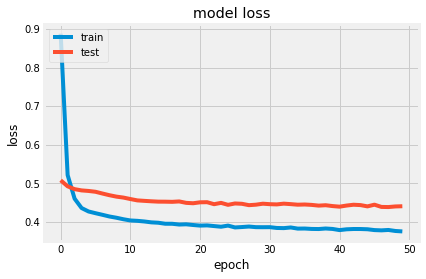

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 500)               42000     
_________________________________________________________________
batch_normalization (BatchNo (None, 500)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 50)                25050     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 1)                 5

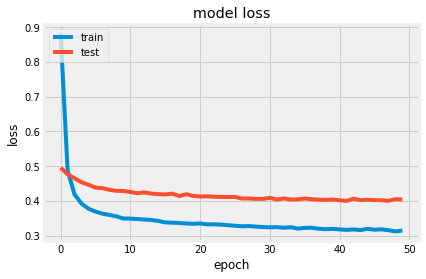

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_3 (ModuleWrap (None, 500)               42000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 50)                25050     
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 1)                

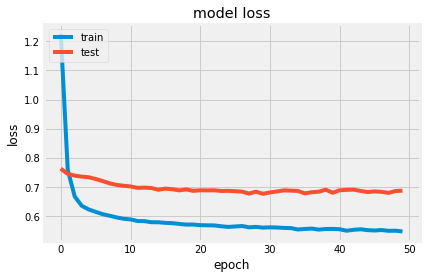

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_6 (ModuleWrap (None, 500)               42000     
_________________________________________________________________
batch_normalization_4 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 50)                25050     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 1)                

In [106]:
test_id=test_data['id_seqpos']
target_lst = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']

not_use_cols = ['id', 'id_seqpos']
train_col=list(train_data.columns)
for j in range(len(not_use_cols)):
    train_col.remove(not_use_cols[j])
test_col=list(test_data.columns)
for j in range(len(not_use_cols)):
    test_col.remove(not_use_cols[j])  

pre=keras(train_data[train_col],test_data[test_col],target_lst,test_id)

In [107]:
pre

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_00073f8be_0,0.791080,0.649203,0.532102
1,id_00073f8be_1,2.629425,3.314082,3.910714
2,id_00073f8be_2,1.376071,0.887982,0.851672
3,id_00073f8be_3,1.133133,0.980804,1.174334
4,id_00073f8be_4,0.852021,0.452511,0.713461
...,...,...,...,...
457948,id_ffda94f24_125,-0.028466,-0.016282,-0.031421
457949,id_ffda94f24_126,-0.095458,-0.293432,-2.668478
457950,id_ffda94f24_127,-0.078180,0.626910,-1.596717
457951,id_ffda94f24_128,-0.205427,0.376641,-4.931435


In [ ]:
df_sample = pd.read_csv(r'sample_submission.csv')
df_sample['reactivity']=pre['reactivity']
df_sample['deg_Mg_pH10']=pre['deg_Mg_pH10']
df_sample['deg_Mg_50C']=pre['deg_Mg_50C']

df_sample.to_csv(r'to_csv_out.csv')